## **Digital Image Processing**
------
### Author: **_Elio David Triana Rodriguez_**
### University: Federal University of Espírito Santo
### Second List - July 2024
------
#### **First Point**:
Perform histogram equalization on the figure low_contrast.jpg. Make the necessary implementations Show the results and comment on your solution.

1. The libraries for code processing are imported. According to the information in the activity document, advanced image processing libraries will **NOT** be used.

In [287]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as sk_
import os

2. The working environment is defined, including the folder where the relevant folders and the source code for processing are located.

In [288]:
origin_path = os.getcwd()
# This is relative path of work. Change if you work with another directory
name_dir = "./img_folder/"

3. A function is developed that organizes the images, properly identifying the path and verifying if the files have been loaded correctly

In [289]:
# Input parameter for this, is the path of workspace
def get_listFiles(origin_path: str = origin_path) -> dict:
    dic_files = {}
    msg_value = "Error: Path search is not exists"
    # Validate existing file
    if os.path.exists(origin_path):
        # Paht of files 
        path_imgs_files = origin_path
        # for any file get and organizate data
        for file in os.listdir(path_imgs_files):
            temp_file_name = os.path.join(path_imgs_files, file)
            # Add new file to dict_files
            if file.split(".")[0] in list(dic_files.keys()):
                dic_files[f"{file.split('.')[0]}_1"] = temp_file_name
                continue
            dic_files[file.split(".")[0]] = temp_file_name
        
        msg_value = "Files read Correctly"
    print(msg_value)
    # Output variable is a dictionary with names and 
    return dic_files

4. Next, a function is created that takes the image parameter and converts it into a data array for processing.

In [290]:
def get_img(path_img: str = "") -> tuple:
    # Read img
    im_temp = sk_.imread(path_img)
    # Make array
    im_array = np.double(im_temp)
    return im_temp.copy(), im_array

5. Finally, the list of images and their paths is loaded into a dictionary to properly develop each item on the list.

In [291]:
imagenes_ = get_listFiles(name_dir)

Files read Correctly


6. Once the data loading functions are developed, the image to be worked on at this point, 'low_contrast', is received. The data array is loaded, and the image is visualized to validate that it is correct.

In [292]:
# First, define the name of the image to be processed
name_img = 'low_contrast'

# Extract the matrices that describe the image
im_array, im_array_d = get_img(imagenes_[name_img])

# Validate the dimensions of the image, considering the second phase of processing
# Working with color images
img_dim = im_array_d.shape

8. Considering that these images may contain all three channels (RGB), a function is developed that allows the unique visualization of a specific image.

In [293]:
# Plot unique img function
def plotImage_unique(img, title_img = "Image process", fig_size = (14, 10), cmap_t = False) -> None:
    fig, ax_s = plt.subplots(nrows = 1, ncols = 1, figsize = fig_size)
    if cmap_t:
        ax_s.imshow(np.uint8(img), vmin=0,vmax=255, cmap = "gray")
    else:
        ax_s.imshow(np.uint8(img), vmin=0,vmax=255)
    ax_s.set_title(title_img)
    ax_s.axis('off')
    return None

9. Using the previous function, the loaded image is visualized.

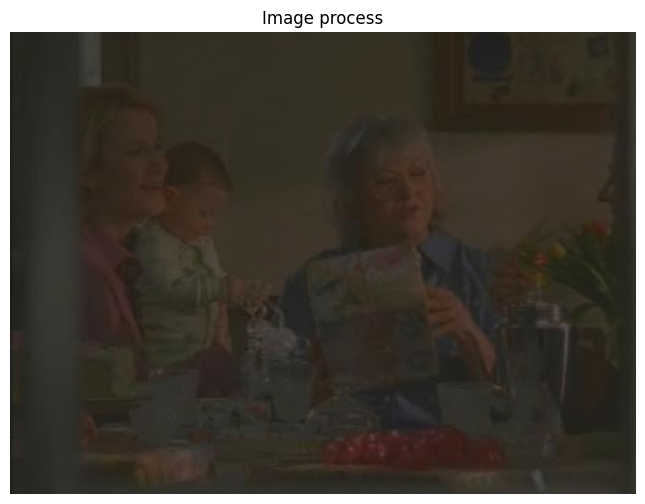

In [294]:
plotImage_unique(im_array_d, fig_size = (10, 6))

10. It is visible that the image is in all 3 color channels. Therefore, to process the image, the first step is to separate each of the image channels. This will allow visualizing the intensity frequency of pixels for each color. To do this, a function is created that separates the channels and returns an array for each channel.

In [295]:
# Function for split color channels from color image
def split_img(img_arr):
    red_channel = img_arr[:, :, 0]
    green_channel = img_arr[:, :, 1]
    blue_channel = img_arr[:, :, 2]
    return red_channel, green_channel, blue_channel


11. So, a function is developed to observe the histogram of each channel.

In [296]:
def plot_hist(r, g, b):
    # Calculate the histogram for each color channel
    red_hist, red_bins = np.histogram(r, bins=256, range=(0, 256))
    green_hist, green_bins = np.histogram(g, bins=256, range=(0, 256))
    blue_hist, blue_bins = np.histogram(b, bins=256, range=(0, 256))

    # Create the figure and axes
    plt.figure(figsize=(10, 6))

    # Plot each histogram
    plt.plot(red_bins[:-1], red_hist, color='red', label='Red')
    plt.plot(green_bins[:-1], green_hist, color='green', label='Green')
    plt.plot(blue_bins[:-1], blue_hist, color='blue', label='Blue')

    # Add title and axis labels
    plt.title('Color Channel Histogram')
    plt.xlabel('Channel Value')
    plt.ylabel('Frequency')

    # Limit the x-axis range
    plt.xlim((0, 255))
    
    # Add a legend
    plt.legend()
    plt.grid()
    
    # Display the plot
    plt.show()

12. The histogram of the image is displayed for each color channel.

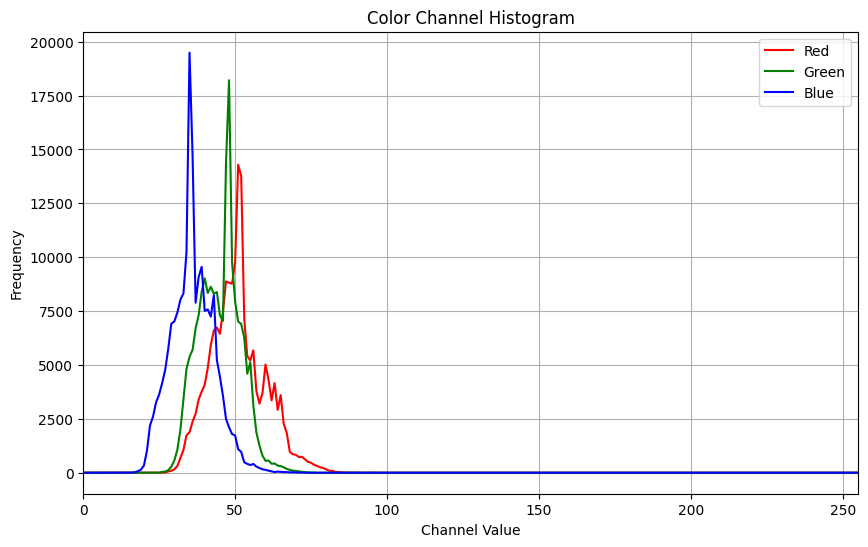

In [297]:
# Its importate define channels from original img
red_channel, green_channel, blue_channel = split_img(im_array)

# Function for histogram 3 channels visualization
plot_hist(red_channel, green_channel, blue_channel)

13. According to the understanding from the reference book, to equalize the image, it's necessary to perform the equalization process for each channel, normalize the resulting data, and convert it to uint8 format. Considering this, a function is developed that accomplishes this process:

In [298]:
def eq_hist(channel):
    # First, validate that the values of the input channel are in uint8 order
    channel = channel.astype('uint8')

    # Perform histogram processing
    c_hist, c_bins = np.histogram(channel, bins=256, range=(0, 256))

    # Create the cumulative distribution function (CDF)
    cdf = c_hist.cumsum()

    # Normalize the cumulative distribution values
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')

    # Apply the equalization to the desired channel
    channel_eq = cdf[channel]

    # Return the output
    return channel_eq


14. The equalization is applied to each of the image channels, and the final result is visualized.

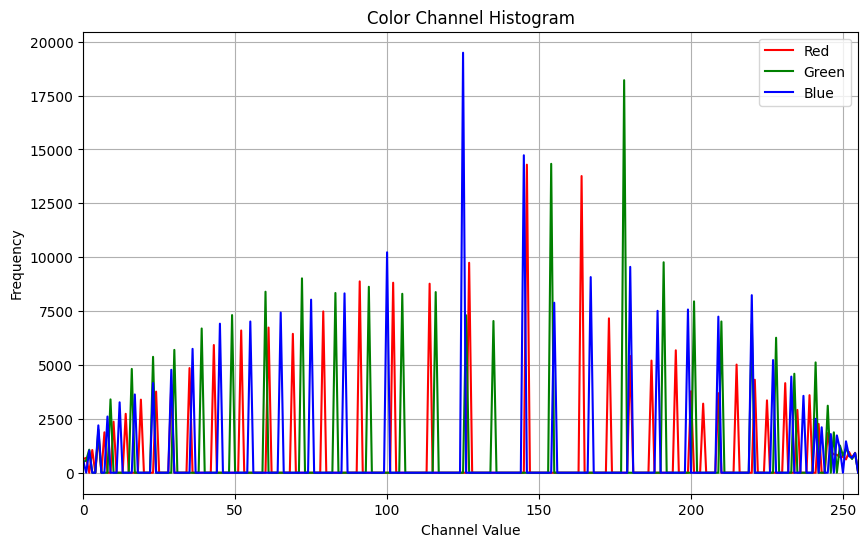

In [299]:
# Equalization for each channel
new_red_channel = eq_hist(red_channel)
new_green_channel = eq_hist(green_channel)
new_blue_channel = eq_hist(blue_channel)

# Again function for histogram 3 channel visualization
plot_hist(new_red_channel, new_green_channel, new_blue_channel)

15. To visualize the final image, it is necessary to combine the equalized color channels and plot the resulting image.

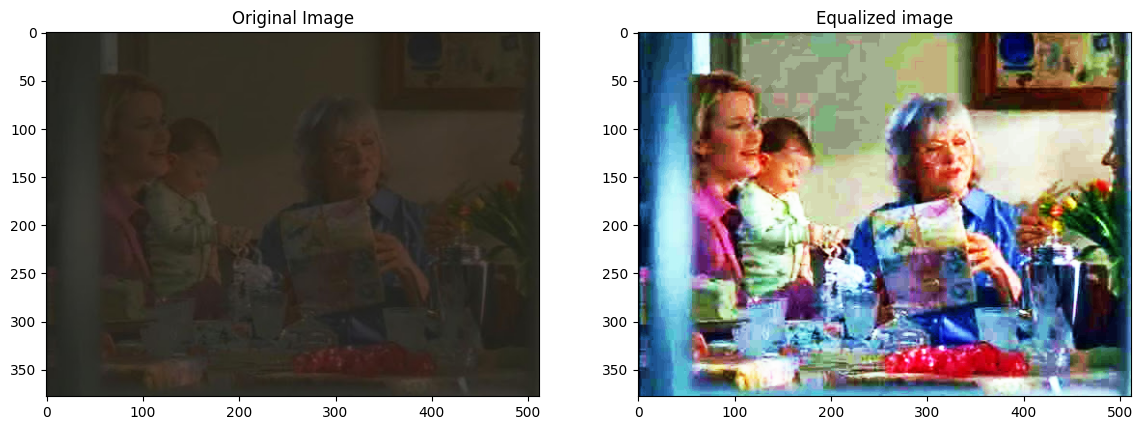

In [300]:
# union of 3 channels resulting
new_eq_img = np.stack((
    new_red_channel, 
    new_green_channel, 
    new_blue_channel),
    axis = -1)
# Image visualization
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(im_array)
plt.subplot(1, 2, 2)
plt.title("Equalized image")
plt.imshow(new_eq_img)
plt.show()

Analysis: According to the obtained result, it can be observed that the method of equalization applied to an image with RGB channels can significantly increase what could be considered the brightness of the original image. However, the color correction does not seem to be accurate, as some colors are enhanced more than others, giving the impression of the image being pixelated or having noise.

#### **Second Point**:
For the image peppers.tiff, create a program that automatically replaces the color of the pepper from red to blue. Discuss your solution.

2.1. For this case, the first step is to load the image to be processed and visualize it.

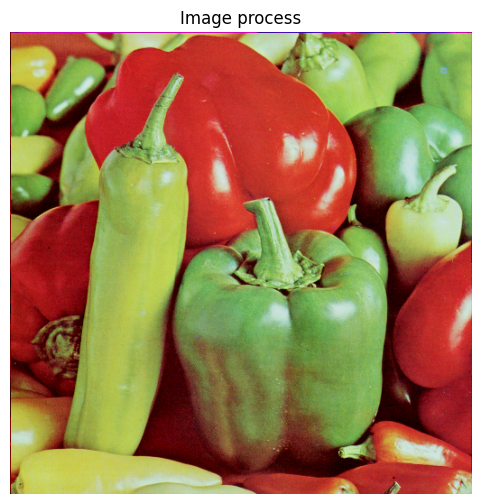

In [301]:
# First, read the image and declare the necessary variables
# Define the name of the image to be processed
name_img = 'peppers'

# Extract the matrices that describe the image
im_array, im_array_d = get_img(imagenes_[name_img])

# Validate the dimensions of the image, considering the second phase of processing
# Working with color images
img_dim = im_array_d.shape

# Visualize the image
plotImage_unique(im_array_d, fig_size=(10, 6))

2.2. For this process, it is considered necessary to transform the RGB channels to HSI to properly configure the image colors. According to the recommendation of the reference book, this is one of the essential steps in the pre-processing of color images. For this purpose, the following function is designed to accommodate the assigned image variation.

In [302]:
# Function to transform an image from RGB to HSI.
def rgb2HSI(img):
    # First, split the original image into separate color channel arrays.
    R, G, B = split_img(img)
    R /= 255
    G /= 255
    B /= 255
    
    # Then, normalize each channel and sum them to obtain the total intensity.
    I = (R + G + B) / 3

    # Next, compute the saturation.
    S = 1 - 3 * np.minimum(R, np.minimum(G, B)) / (R + G + B)
    # Validate possible NaN values and set them to 1.
    S = np.nan_to_num(S, nan=1)

    # Calculate the angle theta.
    theta = np.arccos(
        (0.5 * ((R - G) + (R - B))) / (((R - G) ** 2 + (R - B) * (G - B)) ** 0.5 + 1e-8)
    )
    # Convert this value from radians to degrees.
    theta_g = np.degrees(theta)
    
    # Finally, calculate the hue (H).
    H = np.where(B <= G, theta_g, 360 - theta_g)

    # Combine the calculated arrays into a single HSI matrix.
    img_HSI = np.stack((H, S, I), axis=-1)
    
    # Return the final value.
    return img_HSI


2.3. Once the function is created, it is implemented to obtain the image in HSI channels.

In [303]:
# New img in HSI is create
HSI_img = im_array_d.copy()
HSI_img = rgb2HSI(HSI_img)

C:\Users\edavi\AppData\Local\Temp\ipykernel_24444\611071900.py:13: RuntimeWarning: invalid value encountered in divide
  S = 1 - 3 * np.minimum(R, np.minimum(G, B)) / (R + G + B)


2.4. The function is then executed to modify the reconstructed image in HSI, in such a way that it only affects the channels related to the color red.

In [304]:
# Function to modify HSI image, in a specific interval and a new input value
def change_h(img, inter_val, new_value, valMode=False):
    # First, a copy of the image is created to ensure the original is not modified
    img_proc = img.copy()

    # Extract the H channel
    H = img[:, :, 0]
    # Validate the type of configuration to be performed
    if valMode:
        np.where((inter_val[0] <= H) & (H <= inter_val[1]), H + new_value, H)
        H[H > 360] -= 360
        H[H < 0] += 360
    # In case the validation is false
    else:
        H = np.where((inter_val[0] <= H) & (H <= inter_val[1]), new_value, H)
        H[H > 360] -= 360
        H[H < 0] += 360
    # Finally, the newly calculated H value is assigned
    img_proc[:, :, 0] = H
    # The new processed image is returned
    return img_proc

2.5. First, the modification of the values from 0 to 30 to 240 is validated, as stated in the literature. This directly affects the color response from red to blue.

In [305]:
# Change of values of channel important
new_HSI = change_h(HSI_img, [0, 30], 240, False)
new_HSI = change_h(new_HSI, [330, 360], 240, False)

2.6. Once the channel values have been updated, it is necessary to convert the HSI channels back to RGB in order to correctly visualize the image.

In [306]:
# To convert an HSI image to RGB, the following function is used:
def HSI2rgb(img):
  # First, it is divided into each of the HSI channels
  H = np.copy(img[:,:,0]).flatten()
  S = np.copy(img[:,:,1]).flatten()
  I = np.copy(img[:,:,2]).flatten()
  # The values for the H channel are converted to radians
  H = np.radians(H)
  # Vectors are created to store the RGB values, sized according to the vectors
  # of each channel of the image being processed
  R = np.zeros(H.shape)
  G = np.zeros(S.shape)
  B = np.zeros(I.shape)

  # For the diagonals, the respective position degree values are calculated
  # and specific calculations are performed.
  d60 = np.pi / 3
  d120 = np.pi * 2 / 3
  d240 = np.pi * 4 / 3
  d360 = np.pi * 2

  # In the following loop, the processing is performed
  for idx in range(0, len(H)):
      # For the range from 0 to 120
      if 0 <= H[idx] < d120:
          R[idx] = I[idx] * (1 + (S[idx] * np.cos(H[idx])) / (np.cos(d60 - H[idx])))
          B[idx] = I[idx] * (1 - S[idx])
          G[idx] = 3 * I[idx] - (R[idx] + B[idx])
          continue
      # For the range from 120 to 240
      elif d120 <= H[idx] < d240:
          H[idx] -= d120
          G[idx] = I[idx] * (1 + (S[idx] * np.cos(H[idx])) / (np.cos(d60 - H[idx])))
          R[idx] = I[idx] * (1 - S[idx])
          B[idx] = 3 * I[idx] - (R[idx] + G[idx])
          continue
      # For the range from 240 to 360
      elif d240 <= H[idx] <= d360:
          H[idx] -= d240
          B[idx] = I[idx] * (1 + (S[idx] * np.cos(H[idx])) / (np.cos(d60 - H[idx])))
          G[idx] = I[idx] * (1 - S[idx])
          R[idx] = 3 * I[idx] - (G[idx] + B[idx])
          continue
      else:
          print("Error in the matrix! H values above 360 (2π) or below 0")
          return img

  # Following this, the values for each obtained channel are normalized
  R = np.clip(R, 0, 1)
  G = np.clip(G, 0, 1)
  B = np.clip(B, 0, 1)
  # The output matrix corresponding to the RGB validation is created
  imgRGB = np.zeros(img.shape)
  imgRGB[:,:,0] = R.reshape(img[:,:,0].shape)
  imgRGB[:,:,1] = G.reshape(img[:,:,1].shape)
  imgRGB[:,:,2] = B.reshape(img[:,:,2].shape)
  # It is multiplied by 255 as a reference for possible intensity values from 0-255
  imgRGB = np.around(imgRGB * 255)
  # The final output is then returned
  return imgRGB


2.7 A function is created that allows multiple images to be inputted and visualized in a single figure. This function takes the images as input parameters, a list of strings corresponding to the titles of each image, and some necessary color and intensity configuration parameters.

In [307]:
def show_n(imgs, size = 1, CMAP='gray', titles=None, VMIN=0, VMAX=255, colorbar=False):
    n = len(imgs)
    
    if titles and len(titles) != n:
        print("Erro no número de legendas")
        return
    
    fig = plt.figure(figsize=(10 * size, 4.5 * size))
    
    for i, img in enumerate(imgs):
        ax = fig.add_subplot(1, n, i + 1)
        im = ax.imshow(img, cmap=CMAP, vmin=VMIN, vmax=VMAX)
        if colorbar:
            plt.colorbar(im, ax=ax)
        if titles:
            ax.set_title(titles[i])
    
    plt.show()

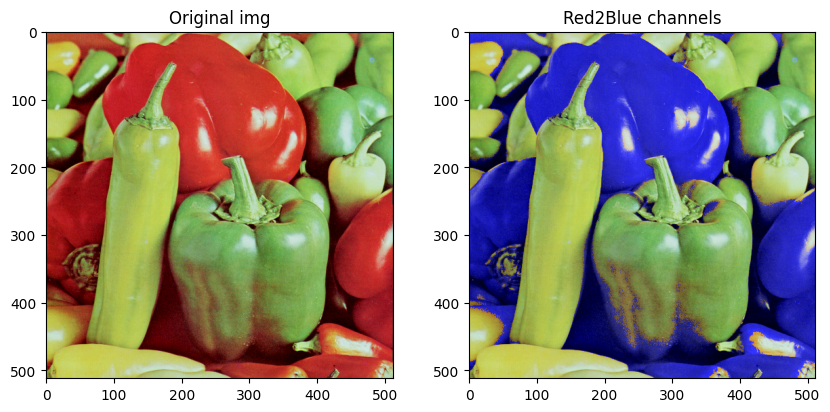

In [308]:
img_4 = HSI2rgb(new_HSI).astype('uint8')

titles = ['Original img', 'Red2Blue channels']
imgs = [im_array, img_4]

show_n(imgs = imgs, titles = titles)

Analysis: In this case, I obtain a color variation with good performance since the process applied to the image in the HSI order gives a much more accurate result in identifying the colors corresponding only to reds. When performing the same procedure in the RGB order, it was observed that not only the reds but also yellows or nearby colors changed. Therefore, this result is much more precise.

#### **Third Point**:
3) Using morphological processing, obtain the skeleton of the image Fig11.10.jpg. Implement the necessary morphological functions. Explain your solution.

3.1 First, we load and visualize the image that will be processed.

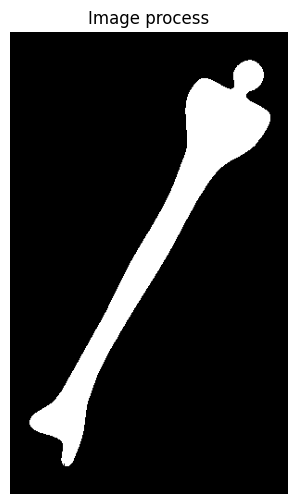

In [309]:
# First, the image is read, and the relevant variables are declared
# First, it is necessary to define the name of the image to be processed
name_img = 'Fig11'
# The matrices that describe the image are extracted
im_array, im_array_d = get_img(imagenes_[name_img])
# The dimensions of the image are validated, taking into account the second processing phase
# Working with color images
img_dim = im_array_d.shape
# Image visualization
plotImage_unique(im_array_d, fig_size = (10, 6), cmap_t = True)

3.2 First, as recommended in the literature, the image is binarized. In this case, it is only validated that the intensity values of the image are between 0 and 1.

In [310]:
# Function for image binarization
bin_img = np.where(
    im_array < 125, 0, 1
)
# Identificate values to uint8 type uint
bin_img = bin_img.astype(np.uint8)

3.3 A function is then developed to perform the skeletonization procedure, as referenced on page ADD NUMBER of the reference book. In this section, the functions for the necessary morphological processing are also developed.
- The function for applying padding is included
- Erosion
- Dilation

In [311]:
# Function for ajust padding from original img
def paddingImg(img, type_p: int = 0, size_p: int = 1):
    # If zero padding 
    if type_p == 0:
        new_img = np.pad(
            img,
            pad_width = size_p,
            mode='constant', 
            constant_values=0
        )
    # For the reflect pading
    elif type_p == 1:
        new_img = np.pad(
            img,
            pad_width = size_p,
            mode='reflect'
        )
    # Mirror
    elif type_p == 2:
        new_img = np.pad(
            img,
            pad_width = size_p,
            mode='edge'
        )
    return new_img

In [312]:
# Funcion de erosion, recibe como parametro de entrada la imagen y kernel de procesamiento
def apply_erosion(img, kernel):
    # Extiende los bordes de la imagen
    # expanded_img = np.zeros((img.shape[0] + 2, img.shape[1] + 2), dtype=img.dtype)
    # expanded_img[1:-1, 1:-1] = img
    expanded_img = paddingImg(img)
    
    # Crear una imgn para almacenar el resultado de la erosión
    result_img = np.empty_like(img)
    
    # Recorrer la imgn original
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            # Seleccionar la región actual
            current_region = expanded_img[x:x + 3, y:y + 3]
            
            # Aplicar la operación de erosión
            result_img[x, y] = np.min(current_region[kernel == 1])
    
    return result_img

In [313]:
# Funcion de dilatacion
def apply_dilation(img, kernel):
    # Expandir la imgn original con bordes de ceros
    # expanded_img = np.zeros((img.shape[0] + 2, img.shape[1] + 2), dtype=img.dtype)
    # expanded_img[1:-1, 1:-1] = img
    expanded_img = paddingImg(img)
    
    # Crear una imgn para almacenar el resultado de la dilatación
    result_img = np.empty_like(img)
    
    # Recorrer la imgn original
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            # Seleccionar la región actual
            current_region = expanded_img[x:x + 3, y:y + 3]
            
            # Aplicar la operación de dilatación
            result_img[x, y] = np.max(current_region[kernel == 1])
    
    return result_img

In [314]:
# The following function takes the image to be processed as an input parameter
def img2skeleton(img):
    # The processing matrix for the convolution is defined
    mat_p = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8)

    # Next, a zero matrix is created where the performed procedures will be stored
    final_img = np.zeros(img.shape, np.uint8)

    # A loop is created that executes the necessary morphological functions 
    # for obtaining the skeletonization procedure
    while True:
        # First, the eroded image is obtained
        eroded_img = apply_erosion(img, mat_p)
        # Next, dilation is applied to the obtained image
        dilated_img = apply_dilation(eroded_img, mat_p)
        # Apply the subtraction and bitwise operations from the numpy library
        subs_img = np.subtract(img, dilated_img)
        final_img = np.bitwise_or(final_img, subs_img)

        # And a final copy of the eroded image is made to perform the loop with each eroded image
        # According to the validation
        img = eroded_img.copy()

        # Loop validation
        if np.count_nonzero(img) == 0:
            break

    # The obtained value is returned
    return final_img

3.4 I apply the created function to the processing image, create the 3-dimensional matrix of the obtained image, and normalize the values to overlay the original image with the final obtained image.

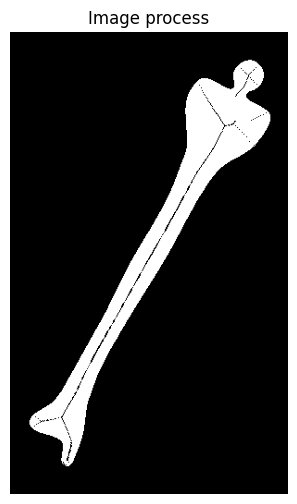

In [315]:
# First, the function is executed
skel_img = img2skeleton(bin_img)

# The matrix is joined to obtain 3 RGB dimensions
dim_img = np.dstack([
    im_array,
    im_array,
    im_array
])

# The position is validated for all positions where the obtained intensity value is 1
# and it is set to black
dim_img[skel_img == 1] = [0, 0, 0]

# Final visualization of the obtained image
plotImage_unique(dim_img, fig_size = (10, 6), cmap_t = True)

Analysis: It can be observed that although the result of the skeleton identification is quite accurate, as it is performed outside the tests presented in this document, the comparison of the performance of the created function versus the existing OpenCV function shows that the result is practically the same. In other aspects, the disconnection of the identified skeleton may be due to a lack of image preprocessing or if some final correction procedure is applied.

#### Fourth Point:
4. Implement the global threshold, global Otsu and local Otsu algorithms and apply them to image-segmentation.jpg and letter.gif images to segment the images into scene (background) and object (foreground). Compare the results of global Otsu to the ready-made graythresh function in Matlab or skimage.filters.threshold_otsu in Python. Compare the results obtained on the images.

4.1 First, the required image is loaded for the processing of the 4th point.

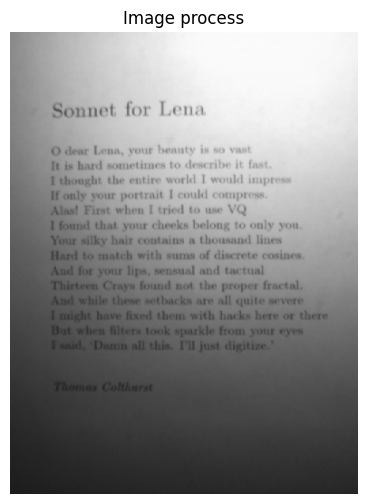

In [316]:
# First, the image is read, and the relevant variables are declared
# First, it is necessary to define the name of the image to be processed
name_img = 'letter'
# The matrices that describe the image are extracted
im_array, im_array_d = get_img(imagenes_[name_img])
# The dimensions of the image are validated, taking into account the second phase of processing
img_dim = im_array_d.shape

# The image is normalized for the GIF format
im_array = im_array[0, ...]
im_array_d = im_array_d[0, ...]

# Image visualization
plotImage_unique(im_array_d, fig_size = (10, 6), cmap_t = True)

4.2 As the first requested process, the simple global threshold function is executed. The input parameters correspond to the image to be processed and the initial Threshold difference value.

In [317]:
def global_Threshold(img, deltaT, T = 127, k = 255, val_1 = 255, val_0 = 0):
    # Copy the input image to avoid modifying the original
    new_img = np.copy(img)
    
    # If the initial threshold T is set to -1, compute the mean of the image
    if T == -1:
        T = np.mean(new_img)
    
    # Loop to iteratively adjust the threshold
    while True:
        # Separate the image into two groups based on the current threshold
        m1 = new_img[new_img > T]
        m2 = new_img[new_img <= T]
        
        # If either group is empty, stop the loop
        if not m1.size or not m2.size:
            break
        
        # Compute the mean of each group
        m1_a = np.mean(m1)
        m2_a = np.mean(m2)
        
        # Calculate the new threshold as the average of the two means
        T_new = (m1_a + m2_a) / 2
        
        # If the change in threshold is less than the specified delta, stop the loop
        if abs(T - T_new) < deltaT:
            break
        # Update the threshold to the new value
        T = T_new
    # Round the final threshold to the nearest integer
    T = int(np.around(T))
    # Apply the threshold to create the binary image
    new_img = np.where(new_img >= T, val_1, val_0)
    # Return the final threshold and the thresholded image
    return T, new_img


4.3 The developed function is implemented on the "letter" image.

In [318]:
T, img_letter_T = global_Threshold(
    img = im_array,
    deltaT = 254
)

4.4 The result obtained from the global threshold processing is visualized.

In [319]:
# The list of images for the letter processing is created
list_img = [
    im_array,
    img_letter_T
]
# And the titles to differentiate the original from the result
T_title = [
    "Original Image",
    f"Global Threshold Segmentation-T={int(T)}"
]

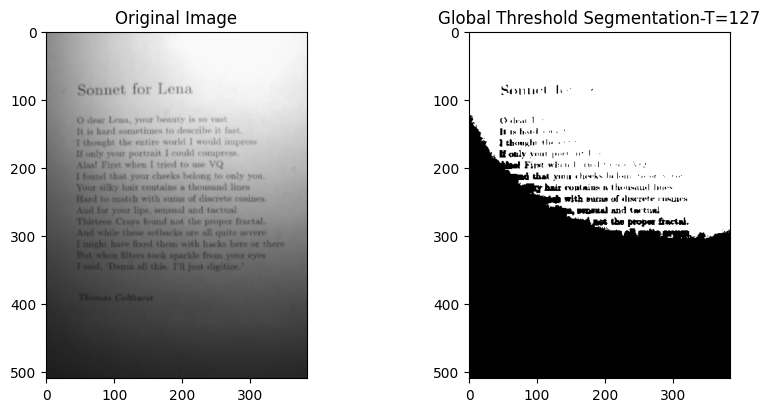

In [320]:
show_n(
    list_img,
    titles = T_title
)

4.5 The second processing image for point 4, "image-segmentation," is loaded and the global threshold is applied.

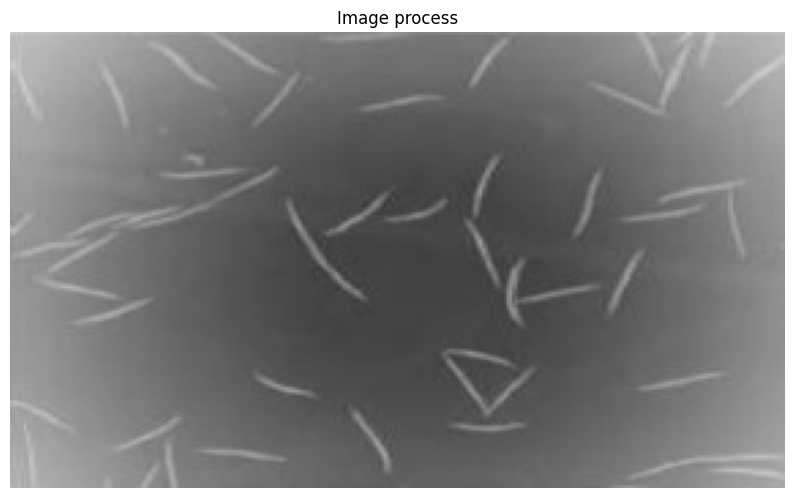

In [321]:
# First, the image is read, and the relevant variables are declared
# First, it is necessary to define the name of the image to be processed
name_img = 'image-segmentation'
# The matrices that describe the image are extracted
im_array_seg, im_array_d_seg = get_img(imagenes_[name_img])
# The dimensions of the image are validated, taking into account the second phase of processing
img_dim_seg = im_array_d.shape

# Image visualization
plotImage_unique(im_array_d_seg, fig_size = (10, 6), cmap_t = True)

4.6 I apply global threshold.

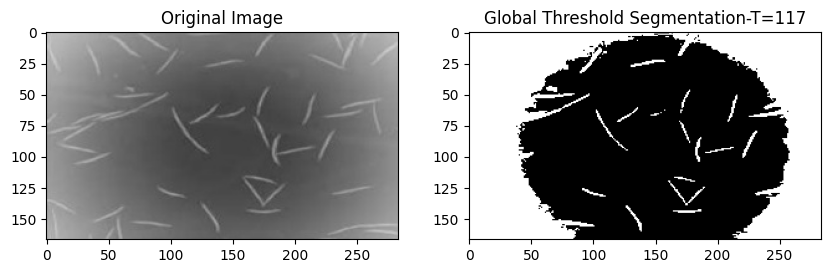

In [322]:
# Apply gloabl threshold function
T, img_seg_T = global_Threshold(
    img = im_array_seg,
    deltaT = 1
)
# Create list of img for visualization
list_img_s = [
    im_array_seg,
    img_seg_T
]
# List of titles for each image
T_title_s = [
    "Original Image",
    f"Global Threshold Segmentation-T={int(T)}"
]

show_n(
    list_img_s,
    titles = T_title_s
)

4.7 For the second case, the function for Otsu's thresholding is created and applied to the two previously presented images.

In [323]:
def otsu_thresholding(image, max_value=255, value_1=255, value_0=0):
    img = np.copy(image)

    # Converting the image to grayscale if it is not already
    if img.ndim == 3:
        img = np.mean(img, axis=2)  # Converting to grayscale using the mean of RGB channels

    # Calculating the histogram
    hist = compute_histogram(img, max_value)
    if hist is None:
        return None, None  # Return early if there was an error in histogram computation

    # Normalizing the histogram
    hist = hist / np.sum(hist)

    # Calculating the total mean intensity
    total_mean = np.dot(np.arange(max_value + 1), hist)

    weight_bg = 0
    mean_bg = 0
    max_variance = 0
    optimal_threshold = 0

    # Iterating through all possible threshold values
    for i in range(max_value):
        weight_bg += hist[i]
        mean_bg += i * hist[i]

        if weight_bg == 0 or weight_bg == 1:
            continue

        # Calculating the between-class variance
        weight_fg = 1 - weight_bg
        mean_fg = (total_mean - mean_bg) / weight_fg if weight_fg != 0 else 0
        between_class_variance = weight_bg * weight_fg * (mean_bg / weight_bg - mean_fg) ** 2

        # Updating the maximum variance and optimal threshold
        if between_class_variance > max_variance:
            max_variance = between_class_variance
            optimal_threshold = i

    # Applying the optimal threshold to binarize the image
    binary_image = np.where(img > optimal_threshold, value_1, value_0)

    return optimal_threshold, binary_image

def compute_histogram(image, max_value=255):
    # Checking if the image intensity levels are within the expected range
    if image.max() > max_value:
        print("Error! Incorrect intensity level!")
        return None

    # Rounding the image values, flattening, and converting to uint8
    rounded_image = np.around(image).flatten().astype('uint8')
    # Calculating the histogram using bincount
    histogram = np.bincount(rounded_image, minlength=max_value + 1)
    
    return histogram


4.8 The created function is applied to each of the images, and the titles are defined for their corresponding comparison.

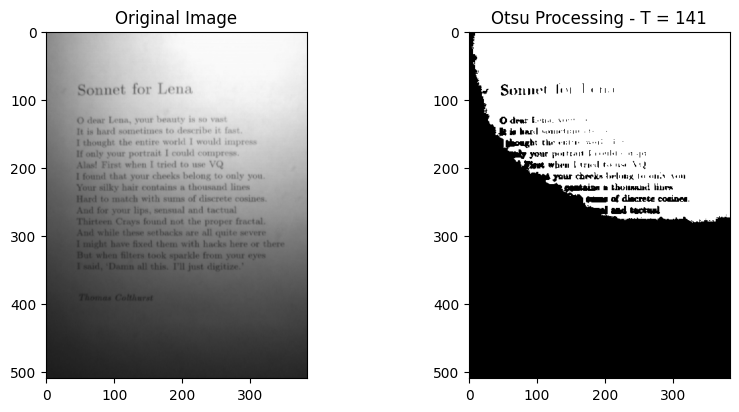

In [324]:
T_letter_2, img_letter_T2 = otsu_thresholding(im_array)

list_imgs = [
    im_array,
    img_letter_T2
]
list_titles = [
    "Original Image",
    f"Otsu Processing - T = {int(T_letter_2)}"
]

# imge visualization
show_n(list_imgs, titles = list_titles)

4.9 Made the process for other image.

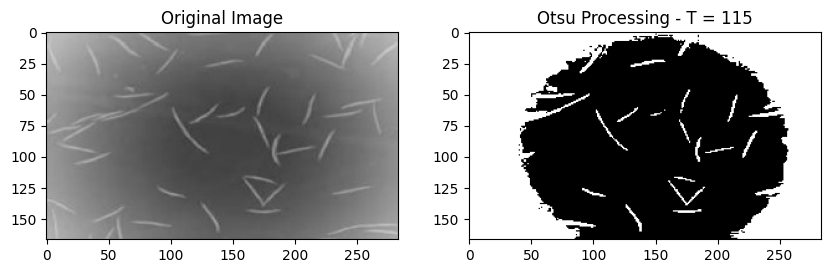

In [325]:
# 
T_seg_2, img_seg_T2 = otsu_thresholding(im_array_seg)

list_imgs = [
    im_array_seg,
    img_seg_T2
]
list_titles = [
    "Original Image",
    f"Otsu Processing - T = {int(T_seg_2)}"
]

# Image visualization
show_n(list_imgs, titles = list_titles)

4.10 It can be observed that although the threshold procedure is changed for the two images, the result changes minimally. This means that the behavior of the procedure is similar for the images in this point, whether using Otsu's method or the global threshold. The T obtained by Otsu's method is slightly higher than that obtained by the global method, but the resulting image is similar. Keeping this in mind, we proceed to perform the local Otsu procedure and compare it with the possible results of the existing functions.

In [326]:
# Se desarrolla la funcion de otsu local
def local_otsu(image, block_size = 25, k=255):
    # Creating an image to store local thresholds
    local_thresholds = np.zeros_like(image[:, :, 0])  # Creating a 2D array

    # Iterating over the image in blocks
    for row in range(0, image.shape[0], block_size):
        for col in range(0, image.shape[1], block_size):
            # Extracting the current block
            block = image[row:row + block_size, col:col + block_size]

            # Calculating the Otsu threshold for the current block using the function
            block_threshold, block_binary = otsu_thresholding(block, max_value = k)

            # Applying thresholding to the block
            local_thresholds[row:row + block_size, col:col + block_size] = block_binary

    return local_thresholds

4.11 This function is applied to the images in this point to verify the obtained result.

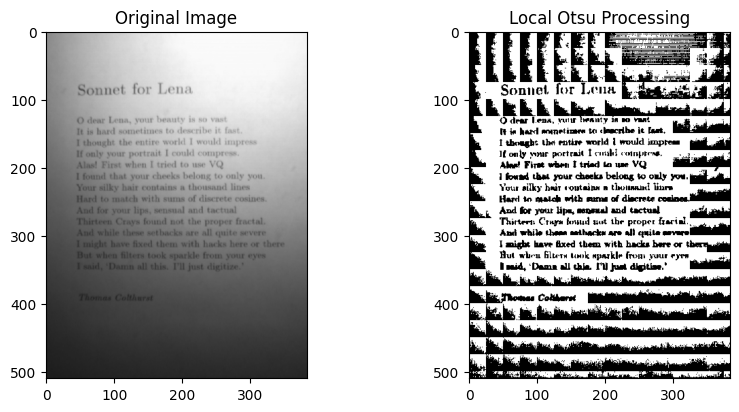

In [327]:
# 
local_otsu_letter = local_otsu(im_array)

list_imgs = [
    im_array,
    local_otsu_letter
]
list_titles = [
    "Original Image",
    f"Local Otsu Processing"
]

show_n(list_imgs, titles = list_titles)

4.12 The same procedure is performed for the segmentation image.

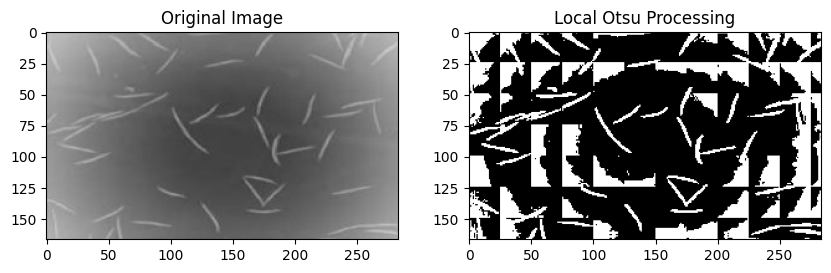

In [328]:
# 
local_otsu_seg = local_otsu(im_array_seg)

list_imgs = [
    im_array_seg,
    local_otsu_seg
]
list_titles = [
    "Original Image",
    f"Local Otsu Processing"
]

show_n(list_imgs, titles = list_titles)

4.13 I finally perform the procedure using existing functions to apply Otsu's method to the same images and compare all the obtained results. First, for the image of the letter. For this procedure, the Otsu function from the skimage library is imported.

In [329]:
from skimage.filters import threshold_otsu

4.14 The function is applied to the "letter" image and the comparative results are analyzed.

C:\Users\edavi\AppData\Local\Temp\ipykernel_24444\750316556.py:2: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (510, 384, 3) looks like that of an RGB image.
  T_sk_letter = threshold_otsu(im_array)


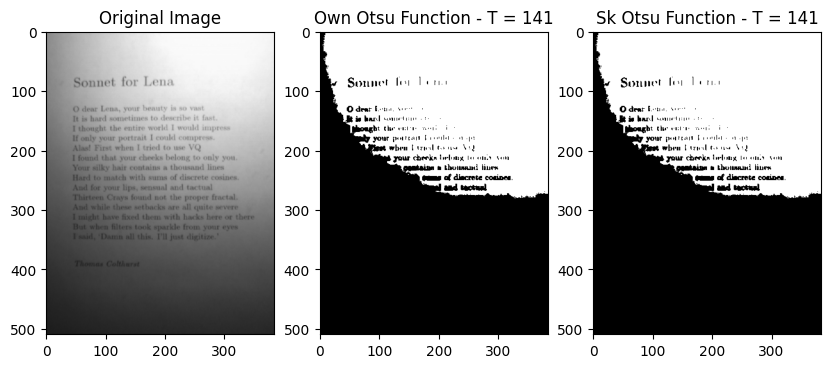

In [330]:
# The Otsu function is applied to the original image
T_sk_letter = threshold_otsu(im_array)

# The calculated T is applied to the image values
img_letter_sk = (im_array > T_sk_letter).astype(int) * 255

# First, the list of images is established
list_imgs = [
    im_array,
    img_letter_T2,
    img_letter_sk
]
list_titles = [
    "Original Image",
    f"Own Otsu Function - T = {int(T_letter_2)}",
    f"Sk Otsu Function - T = {int(T_sk_letter)}",
]

# Image visualization
show_n(list_imgs, titles=list_titles)

C:\Users\edavi\AppData\Local\Temp\ipykernel_24444\1714556065.py:2: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (167, 284, 3) looks like that of an RGB image.
  T_sk_seg = threshold_otsu(im_array_seg)


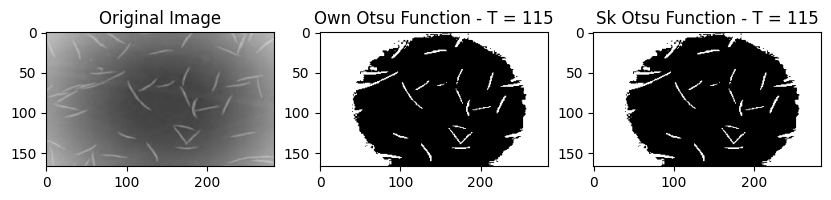

In [331]:
# The Otsu function is applied to the original image
T_sk_seg = threshold_otsu(im_array_seg)

# The calculated T is applied to the image values
img_seg_sk = (im_array_seg > T_sk_seg).astype(int) * 255

# First, the list of images is established
list_imgs = [
    im_array_seg,
    img_seg_T2,
    img_seg_sk
]
list_titles = [
    "Original Image",
    f"Own Otsu Function - T = {int(T_seg_2)}",
    f"Sk Otsu Function - T = {int(T_sk_seg)}",
]

# Image visualization
show_n(list_imgs, titles=list_titles)

Analysis: We can observe that the procedure performed for the Otsu threshold method behaves the same as the function provided by the library. Successfully replicating the functionality was completed, including the obtained T value. However, it is observed that this procedure is not sufficient to identify the letters in the given image.

#### Fifth Point
5. Segment the image Fig8.02(a).jpg into 3 distinct regions (3 shades of gray). Apply the same procedure to the image Fig8.02(a).jpg and compare the results. Explain your solution. You must generate a final image with 3 shades of gray, one for each class. Then, add a light red border to each of the classes.

5.1 First, the required image is loaded for the processing of the 5th point.

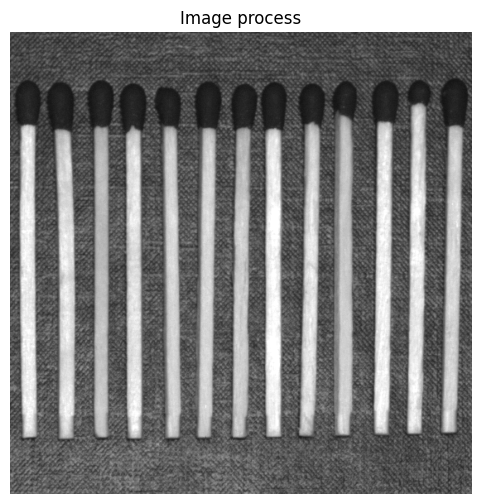

In [332]:
name_img = 'Fig8'

im_array, im_array_d = get_img(imagenes_[name_img])

img_dim = im_array_d.shape

plotImage_unique(im_array_d, fig_size = (10, 6), cmap_t = True)

5.2 Before continuing with the segmentation process, it is important to perform preprocessing on the given image. This preprocessing involves applying a low-pass filter to the original image to reduce noise. For this, we create a function that generates a kernel for a low-pass filter given the specified conditions.

In [333]:
# Primero kernel de lowpass
def kernel_lowPassFilter(size_m: int = 3, type_k: int = 0, sigma: float = 1.0):
    # check value of size
    if size_m <= 0 or size_m == 1:
        # Default value of size kernel
        size_m = 3
    elif size_m%2 == 0:
        # new size of kernel
        size_m += 1
    
    # mean filter type kernel
    if type_k == 0:
        # Create matrix
        kernel_out = np.ones((size_m, size_m))/size_m**2
    
    # Gaussian Filter Spatial kernel
    elif type_k == 1:
        # Make de gaussian matrix
        kernel_out = np.zeros((size_m, size_m))
        # Calculate de center of matrixx
        center = size_m // 2
        # loops for gaussian calculate
        for i in range(size_m):
            for j in range(size_m):
                x = i - center
                y = j - center
                kernel_out[i, j] = (1 / (2 * np.pi * sigma ** 2)) * np.exp(-(x ** 2 + y ** 2) / (2 * sigma ** 2))
        # Normalize the matrix so that the sum of all elements is 1
        kernel_out /= np.sum(kernel_out)
    # SOutput
    return kernel_out


5.3 Once the kernel creation function is made, it is necessary to create a function to perform the convolution of the low-pass filter kernel with the original image, including a function that allows for considering different types of paddings for the processing.

In [334]:
# Function for ajust padding from original img
def paddingImg(img, type_p: int = 0, size_p: int = 1):
    # If zero padding 
    if type_p == 0:
        new_img = np.pad(
            img,
            pad_width = size_p,
            mode='constant', 
            constant_values=0
        )
    # For the reflect pading
    elif type_p == 1:
        new_img = np.pad(
            img,
            pad_width = size_p,
            mode='reflect'
        )
    # Mirror
    elif type_p == 2:
        new_img = np.pad(
            img,
            pad_width = size_p,
            mode='edge'
        )
    return new_img

# Convolutional function
def applyConvolutional(img, kernel, padd_img = 1):
    # Make copy of original img
    copy_img = img.copy()
    dim_img = copy_img.shape
    # Dimensions of matrix
    dim_m = kernel.shape

    # Validation of val_ separation of pixels
    val_ = int((dim_m[0]-1)/2)

    # Output matrix and padding processing
    copy_img = paddingImg(copy_img, padd_img, val_)
    img_r = np.zeros(dim_img)

    # loops for convolutionaal calculate
    for row_o in range(dim_img[0]):
        for col_o in range(dim_img[1]):
            # Variable sum of convoluttional
            suma_ = 0.0
            for fila_m in range(dim_m[0]):
                for col_m in range(dim_m[1]):
                    # Sum process
                    suma_ += copy_img[row_o+fila_m, col_o+col_m] * kernel[fila_m, col_m]
            img_r[row_o, col_o] = int(suma_)
    return img_r

5.4 Having created the functions, we apply them to the original image and visualize the result, which should appear slightly blurrier than the original image. For this process, a 5x5 average filter was selected.

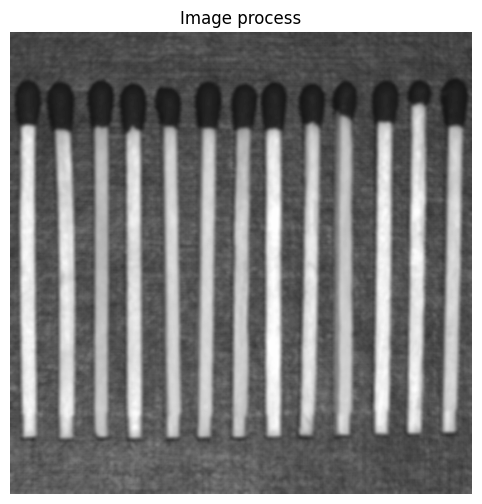

In [335]:
# Kernel for low pass and salt eliminate
low_kernel = kernel_lowPassFilter(5, 0)
# # Apply convolutional filter
img_filtered = applyConvolutional(im_array, low_kernel)

# Visualization
plotImage_unique(img_filtered, fig_size = (10, 6), cmap_t = True)
# plotImageHist(img_filtered, hist = False)

5.5 A function is created that calculates the variance between the color classes and sections of the given image, in such a way that it can identify the related regions and the existing pixels in those regions.

In [336]:
# Function that performs the calculation between the class variances is developed
def calculate_variance_between_class(thresholds, pixel_counts, total_pixels):
    # Sort the thresholds in ascending order
    thresholds = sorted(thresholds)
    
    # Calculate the total mean intensity of the image
    total_mean = np.dot(np.arange(256), pixel_counts) / total_pixels
    
    # Initialize lists to store class means and class weights
    class_means = []
    class_weights = []
    
    # Initialize the starting index for the first class
    start = 0
    
    # Iterate through each threshold to calculate class means and weights
    for t in thresholds:
        # Calculate the weight of the current class
        weight = np.sum(pixel_counts[start:t])
        
        # Calculate the mean intensity of the current class
        mean = np.dot(np.arange(start, t), pixel_counts[start:t]) / weight if weight > 0 else 0
        
        # Append the mean and weight to their respective lists
        class_means.append(mean)
        class_weights.append(weight / total_pixels)
        
        # Update the starting index for the next class
        start = t
    
    # For the last segment, calculate its weight and mean
    weight = np.sum(pixel_counts[start:])
    mean = np.dot(np.arange(start, 256), pixel_counts[start:]) / weight if weight > 0 else 0
    
    # Append the last class's mean and weight
    class_means.append(mean)
    class_weights.append(weight / total_pixels)
    
    # Calculate the between-class variance
    variance_between = sum(
        class_weights[i] * (class_means[i] - total_mean) ** 2
        for i in range(len(class_means))
    )
    
    # Return the value of the variance
    return variance_between


5.4 At the same time, it is necessary to create a function that establishes the regions and gray values for multi-thresholding using Otsu's method.

In [337]:
# Next, the function that performs the multiple Otsu thresholding calculation is developed
def otsu_multi_thresholding(image, num_thresholds):
    # Flatten the image array and calculate the histogram
    pixel_counts = np.bincount(image.flatten(), minlength=256)
    total_pixels = image.size
    
    best_thresholds = []
    max_variance = 0
    
    # Iterate through all possible threshold combinations
    if num_thresholds == 1:
        # If there is only one threshold, iterate through all possible thresholds
        for t in range(1, 256):
            # Calculate between-class variance for the current threshold
            variance_between = calculate_variance_between_class([t], pixel_counts, total_pixels)
            # Update the best threshold if the current variance is higher than the maximum found so far
            if variance_between > max_variance:
                max_variance = variance_between
                best_thresholds = [t]
    elif num_thresholds == 2:
        # If there are two thresholds, iterate through all possible threshold pairs
        for t1 in range(1, 255):
            for t2 in range(t1 + 1, 256):
                # Calculate between-class variance for the current pair of thresholds
                variance_between = calculate_variance_between_class([t1, t2], pixel_counts, total_pixels)
                # Update the best thresholds if the current variance is higher than the maximum found so far
                if variance_between > max_variance:
                    max_variance = variance_between
                    best_thresholds = [t1, t2]
    elif num_thresholds == 3:
        # If there are three thresholds, iterate through all possible threshold triples
        for t1 in range(1, 254):
            for t2 in range(t1 + 1, 255):
                for t3 in range(t2 + 1, 256):
                    # Calculate between-class variance for the current triple of thresholds
                    variance_between = calculate_variance_between_class([t1, t2, t3], pixel_counts, total_pixels)
                    # Update the best thresholds if the current variance is higher than the maximum found so far
                    if variance_between > max_variance:
                        max_variance = variance_between
                        best_thresholds = [t1, t2, t3]
    else:
        # Raise an error if the number of thresholds is greater than 3
        raise ValueError("This example only supports up to 2 thresholds.")
    
    # Return the best thresholds found
    return best_thresholds


5.5 All values are converted to int64, as very large values may be obtained in the calculations.

In [338]:
# Convert to int64 type value
array_im_int = img_filtered.copy()
array_im_int = np.int64(array_im_int)

5.6 The number of thresholds to be obtained is established, and then the final image is digitized and segmented.

In [339]:
# Threshold calculate
num_thresholds = 3
thresholds = otsu_multi_thresholding(array_im_int, num_thresholds)

# Segmentation of resulting image
segmented_image = np.digitize(array_im_int, bins=thresholds)

5.7 Finally, each of the images obtained for each threshold is visualized.

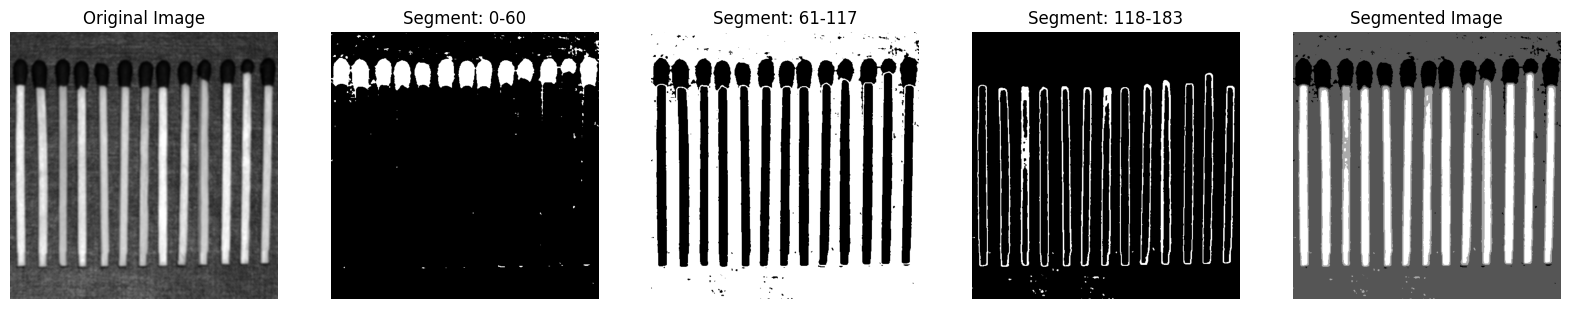

In [340]:
# Display the results 3 SEGMENTACIONES
plt.figure(figsize=(20, 14))

# Original image
plt.subplot(1, num_thresholds + 2, 1)
plt.title('Original Image')
plt.imshow(array_im_int, cmap='gray')
plt.axis('off')

# Segmented images for each threshold
threshold_ranges = [0] + thresholds + [256]
for i in range(len(thresholds) + 1):
    segmented_single = ((array_im_int >= threshold_ranges[i]) & (array_im_int < threshold_ranges[i + 1])).astype(int)
    plt.subplot(1, num_thresholds + 2, i + 2)
    plt.title(f'Segment: {threshold_ranges[i]}-{threshold_ranges[i+1]-1}')
    plt.imshow(segmented_single, cmap='gray')
    plt.axis('off')

# Combined segmented image
plt.subplot(1, num_thresholds + 2, num_thresholds + 2)
plt.title('Segmented Image')
plt.imshow(segmented_image, cmap='gray')
plt.axis('off')

plt.show()

5.8 The next step involves the linearization of the edges. To do this, the first step is to normalize the image to ensure that the intensities do not exceed the range of 0 to 255.

In [341]:
# Normalization function
def normalization_img(img):
    img_ = (img - np.min(img)) / (np.max(img) - np.min(img)) * 255
    # pass from float to uint8
    img_out = np.uint8(img_)
    return img_out

In [342]:
# Apply normalization function developed
img_normalized = normalization_img(segmented_image)

5.9 With the image already normalized, the edge detection function is performed using the Canny method. This method helps to differentiate the thresholds of the colors in the finally segmented image.

In [343]:
# Now the Canny processing is performed
def g_and_angle(img):
    # Applies Sobel filters to calculate the derivatives in x and y.
    dim_i = img.shape
    img_r = np.zeros(dim_i)
    img_a = np.zeros(dim_i)

    # Sobel filters
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

    # Convolution application
    # loop for coordinates of img matrix
    for row_o in range(1, dim_i[0] - 2):
        for col_o in range(1, dim_i[1] - 2):
            # Direction calculation
            gx = np.sum(np.multiply(Kx, img[row_o:row_o + 3, col_o:col_o + 3]))  # x direction
            gy = np.sum(np.multiply(Ky, img[row_o:row_o + 3, col_o:col_o + 3]))  # y direction
            # Hypotenuse calculation
            img_r[row_o + 1, col_o + 1] = np.sqrt(gx ** 2 + gy ** 2)
            # Arctangent calculation
            img_a[row_o + 1, col_o + 1] = np.arctan2(gy, gx)
    # Gradient and angle output
    return img_r, img_a

5.10 Along with the previous function, it is necessary to develop a function that helps reduce the obtained edges. For this, the "non-maximum suppression" function is developed, which helps to shape the edges according to the given angles.

In [344]:
def non_max_suppression(G, theta):
    """Apply non-maximum suppression to thin the edges"""
    M, N = G.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = theta * 180. / np.pi
    angle[angle < 0] += 180

    for i in range(1, M-1):
        for j in range(1, N-1):
            try:
                q = 255
                r = 255
                
                # 0 degrees
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = G[i, j+1]
                    r = G[i, j-1]
                # 45 degrees
                elif (22.5 <= angle[i,j] < 67.5):
                    q = G[i+1, j-1]
                    r = G[i-1, j+1]
                # 90 degrees
                elif (67.5 <= angle[i,j] < 112.5):
                    q = G[i+1, j]
                    r = G[i-1, j]
                # 135 degrees
                elif (112.5 <= angle[i,j] < 157.5):
                    q = G[i-1, j-1]
                    r = G[i+1, j+1]

                if (G[i,j] >= q) and (G[i,j] >= r):
                    Z[i,j] = G[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass
    return Z

5.11 Finally, through a basic thresholding function, we outline the specific position where the red lines should be before drawing them on the image.

In [345]:
# The following function is designed for thresholding
def threshold(img, lowThreshold, highThreshold):
    """Applies hysteresis thresholding."""
    M, N = img.shape
    res = np.zeros((M, N), dtype=np.int32)

    # Identify strong, weak, and zero pixel positions
    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))

    # Set strong pixels to 255 and weak pixels to 50
    res[strong_i, strong_j] = 255
    res[weak_i, weak_j] = 50

    # Iterate through the image to apply hysteresis
    for i in range(1, M-1):
        for j in range(1, N-1):
            if res[i, j] == 50:
                try:
                    # Check the 8-connected neighborhood for strong edges
                    if ((res[i+1, j-1] == 255) or (res[i+1, j] == 255) or (res[i+1, j+1] == 255)
                        or (res[i, j-1] == 255) or (res[i, j+1] == 255)
                        or (res[i-1, j-1] == 255) or (res[i-1, j] == 255) or (res[i-1, j+1] == 255)):
                        res[i, j] = 255
                    else:
                        res[i, j] = 0
                except IndexError as e:
                    pass  # Ignore border errors
    return res


5.12 With the necessary functions developed, we apply them to the image processing to define the position where the red edge will be.

In [346]:
# Obtaining angles
G, theta = g_and_angle(img_normalized)
# Non-maximum suppression
img_no_supp = non_max_suppression(G, theta)
# Threshold in the grayscale range of the image and obtain the positions of the red edge
img_final = threshold(img_no_supp, 10, 30)
# Next, the image is converted from 1 channel to 3 channels.
imagen_rgb = np.stack((img_normalized,) * 3, axis=-1)

5.13 Finally, the maximum value is applied in the R channel to visualize the red color and the final image is displayed.

(-0.5, 557.5, 557.5, -0.5)

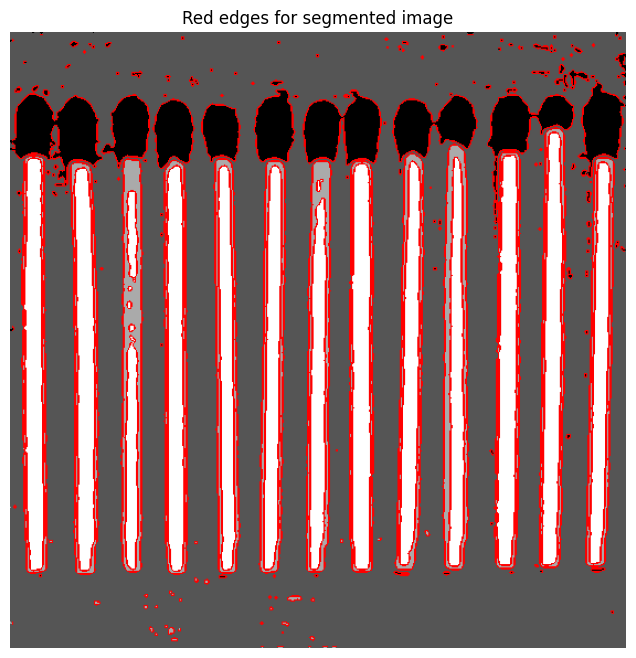

In [347]:
# Valor en canal rojo
imagen_rgb[img_final != 0] = [255, 0, 0]
ig, ax_s = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 8))
ax_s.imshow(np.uint8(imagen_rgb), vmin=0,vmax=255)
ax_s.set_title("Red edges for segmented image")
ax_s.axis('off')

Analysis: The performed procedure allows observing good segmentation of the objects presented in the image, in this case, the matches. Although the multiple segmentation delimits each part of the object, there is still noise present due to the proximity of the calculated thresholds or some image correction.

5.14 The procedure is repeated for the second image provided in this point. First, the image is loaded and visualized.

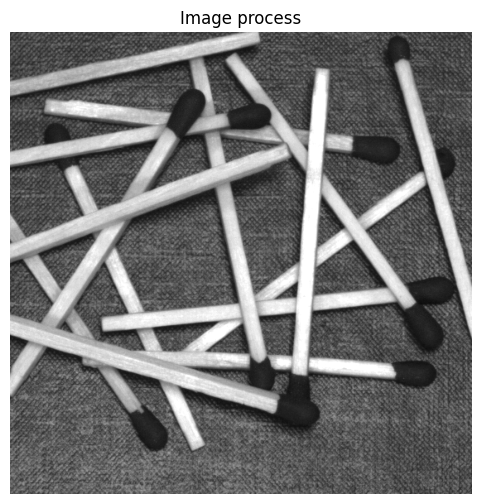

In [348]:
# Load and visualize the image for processing
name_img = 'Fig8_1'
# Extract the matrices that describe the image
im_array, im_array_d = get_img(imagenes_[name_img])
# Validate the dimensions of the image, taking into account the second phase of processing
img_dim = im_array_d.shape

# Image visualization
plotImage_unique(im_array_d, fig_size=(10, 6), cmap_t=True)

5.15 Next, the low-pass filter is applied using the function developed earlier and the transformed image is visualized.

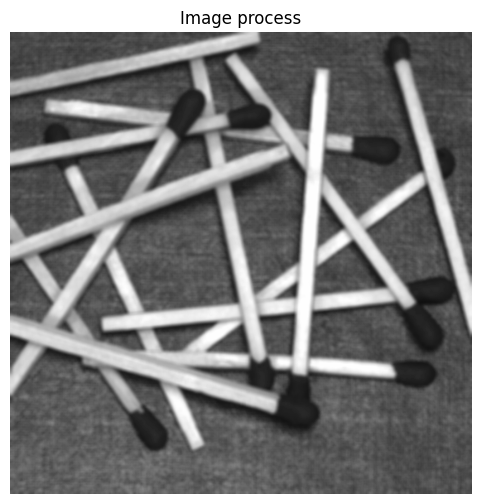

In [349]:
# Kernel for low pass and salt eliminate
low_kernel = kernel_lowPassFilter(5, 0)
# # Apply convolutional filter
img_filtered = applyConvolutional(im_array, low_kernel)

plotImage_unique(img_filtered, fig_size = (10, 6), cmap_t = True)

5.16 The image is converted to int64 to avoid errors with very large values, and the function for multi-thresholding calculation developed in point 5.4 is applied.

In [350]:
# convert to int 64
array_im_int_2 = img_filtered.copy()
array_im_int_2 = np.int64(array_im_int_2)

# Calculate Thresholds
num_thresholds = 3
thresholds = otsu_multi_thresholding(array_im_int_2, num_thresholds)

# Final img
segmented_image = np.digitize(array_im_int_2, bins=thresholds)

5.17 The result of the multi-thresholding and the final segmented image are visualized.

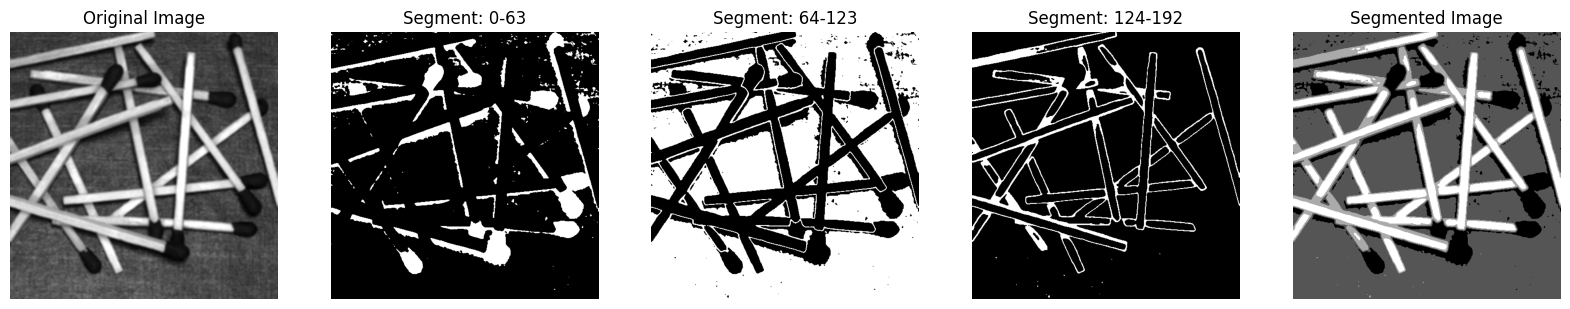

In [351]:
# Display the results 3 SEGMENTACIONES
plt.figure(figsize=(20, 14))

# Original image
plt.subplot(1, num_thresholds + 2, 1)
plt.title('Original Image')
plt.imshow(array_im_int_2, cmap='gray')
plt.axis('off')

# Segmented images for each threshold
threshold_ranges = [0] + thresholds + [256]
for i in range(len(thresholds) + 1):
    segmented_single = ((array_im_int_2 >= threshold_ranges[i]) & (array_im_int_2 < threshold_ranges[i + 1])).astype(int)
    plt.subplot(1, num_thresholds + 2, i + 2)
    plt.title(f'Segment: {threshold_ranges[i]}-{threshold_ranges[i+1]-1}')
    plt.imshow(segmented_single, cmap='gray')
    plt.axis('off')

# Combined segmented image
plt.subplot(1, num_thresholds + 2, num_thresholds + 2)
plt.title('Segmented Image')
plt.imshow(segmented_image, cmap='gray')
plt.axis('off')

plt.show()

5.18 Next, the functions developed in points 5.9, 5.10, and 5.11 are used and applied to obtain the red-bordered image, including the normalization of the image being processed at this moment.

In [352]:
# Normalization processing is performed
img_normalizada = normalization_img(segmented_image)

# Angles are obtained
G, theta = g_and_angle(img_normalizada)
# Apply the suppression method
img_no_supp = non_max_suppression(G, theta)
# Final edge positions are obtained
img_final = threshold(img_no_supp, 10, 30)

# Finally, the image is converted from grayscale to RGB
imagen_rgb = np.stack((img_normalizada,) * 3, axis=-1)

5.19 After completing this processing, the value of the R channel is increased to visualize the red color in the image and the final result is displayed.

(-0.5, 557.5, 557.5, -0.5)

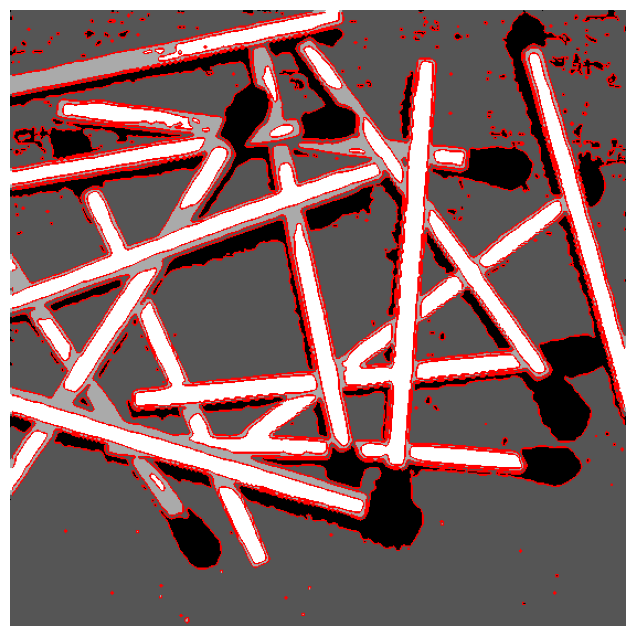

In [353]:
# R value
imagen_rgb[img_final != 0] = [255, 0, 0]
# VFinal img visualization
ig, ax_s = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 8))
ax_s.imshow(np.uint8(imagen_rgb), vmin=0,vmax=255)
#ax_s.set_title(list_title[0])
ax_s.axis('off')

Analysis: It is confirmed in this second image that the multithresholding procedure and correction by filter allow observing a very good result. However, noise due to the proximity of thresholds still exists. A region counting method could be applied to eliminate the error by determining the different types of gray obtained.

#### Sixth Point
6. Based on Chapter 10, propose an approach for segmenting the photo pill.jpg. Compare the segmentation result with the mask.png image. Count how many pixels were segmented wrong. Explain your solution and comment on the results.

6.1 First, the required image is loaded for the processing of the 6th point.

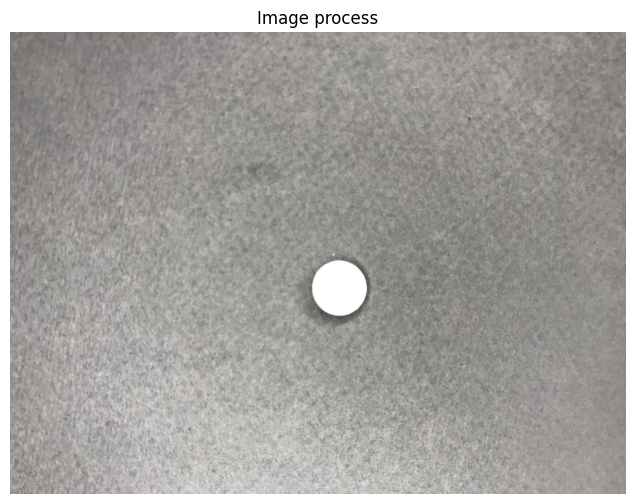

In [354]:
# First, the image is read, and the relevant variables are declared
# First, it is necessary to define the name of the image to be processed
name_img = 'pill'
# The matrices that describe the image are extracted
im_array, im_array_d = get_img(imagenes_[name_img])
# The dimensions of the image are validated, taking into account the second phase of processing
img_dim = im_array_d.shape

# Image visualization
plotImage_unique(im_array_d, fig_size = (10, 6), cmap_t = True)

6.2 Since the image is in 3 channels, I first transform it to a single channel.

In [355]:
gray_image_np = 0.299 * im_array[:, :, 0] + 0.587 * im_array[:, :, 1] + 0.114 * im_array[:, :, 2]

# Ensure the pixel values are in the correct range
gray_array_im = gray_image_np.astype(np.uint8)

6.3 A visualization function is created, which allows viewing the processed image alongside the histogram. This way, I can observe its distribution and consider the best options for segmentation.

In [356]:
def plotImageHist(img, list_title: list = ["Image", "Histogram"], hist: bool = True) -> None:
    # Condition if show histogram
    if hist:
        fig, ax_s = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 8))
        ax_s[0].imshow(np.uint8(img), cmap='gray', vmin=0,vmax=255)
        ax_s[0].set_title(list_title[0])
        ax_s[0].axis('off')
        ax_s[1].hist(img.ravel(), bins = 256, range=[0,256]);
        ax_s[1].set_title(list_title[1])
    else:
        # Option if not show histogram
        fig, ax_s = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 8))
        ax_s.imshow(np.uint8(img), cmap='gray', vmin=0,vmax=255)
        ax_s.set_title(list_title[0])
        ax_s.axis('off')
    # Return Nothing
    return None

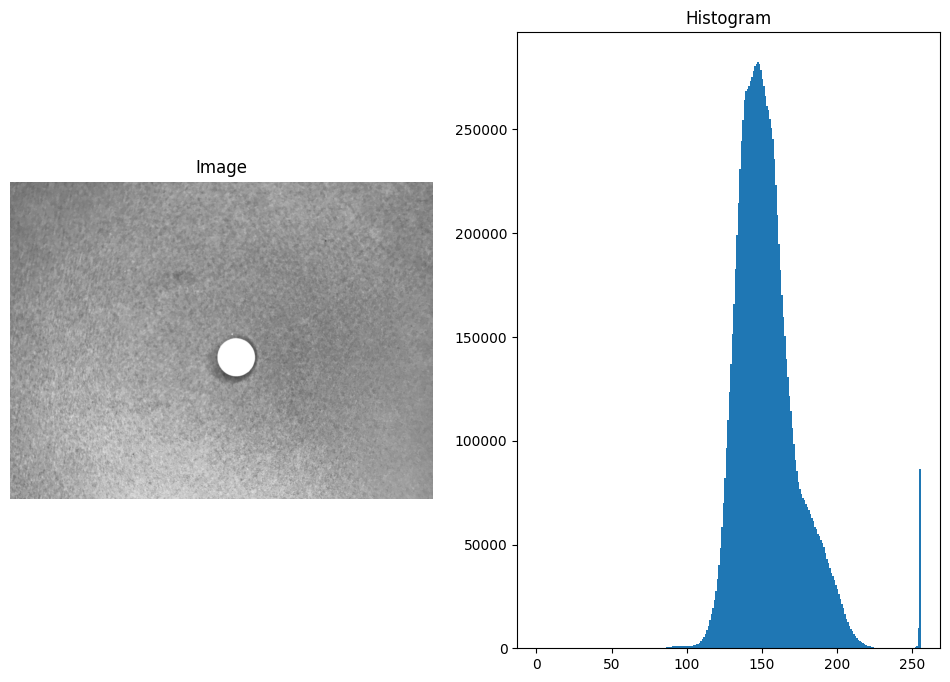

In [357]:
plotImageHist(gray_array_im, hist = True)

6.4 I then follow the procedure of USING EDGES TO IMPROVE GLOBAL THRESHOLDING - Chapter 10, described in the reference book, where the edges of the image are identified for subsequent segmentation.

In [358]:
def special_thresholding(image, window_size=15, k=0.5, R=128):
    """
    Parameters:
    - image: 2D numpy array, the grayscale image to be thresholded.
    - window_size: int, the size of the window used to calculate the local threshold.
    - k: float, the weight parameter.
    - R: float, the dynamic range of standard deviation.
    
    Returns:
    - binary_image: 2D numpy array, the binary thresholded image.
    """
    # Ensure the window size is odd
    if window_size % 2 == 0:
        window_size += 1

    half_window = window_size // 2
    mean = np.zeros(image.shape)
    stddev = np.zeros(image.shape)
    
    # Pad the image to handle border pixels
    padded_image = np.pad(image, half_window, mode='reflect')
    
    # Iterate over each pixel in the image
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Extract the local window
            local_window = padded_image[i:i + window_size, j:j + window_size]
            local_mean = np.mean(local_window)
            local_stddev = np.std(local_window)
            mean[i, j] = local_mean
            stddev[i, j] = local_stddev
    
    # Calculate the Sauvola threshold for each pixel
    threshold = mean * (1 + k * ((stddev / R) - 1))
    binary_image = image > threshold
    
    return binary_image.astype(np.uint8) * 255

In [359]:
# Aplly the function with specific values
img_final = special_thresholding(gray_array_im, 25, k = 0.18, R = 130)

6.5 The previous step returns an inverted value, so I invert the intensities to ensure the background is identified as white.

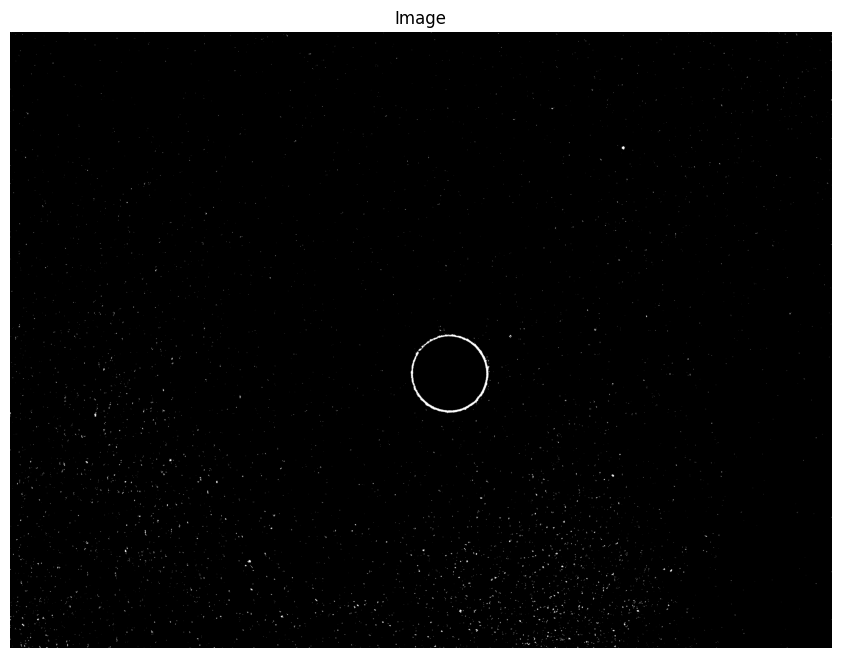

In [360]:
img_final[img_final == 0] = 5
img_final[img_final == 255] = 0
img_final[img_final == 5] = 255

plotImageHist(img_final, hist = False)

6.6 Next, a function is implemented to establish the relationships between pixels in order to differentiate noise-related pixels from those related to the actual image.

In [361]:
# Functions for relacionship between pixels
def rel_adjacency(mat, x, y, label, visited):
    # Stack for storing the pixels to be checked
    stack = [(x, y)]
    directions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
    
    while stack:
        cx, cy = stack.pop()
        if visited[cx, cy]:
            continue
        # Mark the current pixel as visited and part of the current component
        visited[cx, cy] = True
        mat[cx, cy] = label
        
        # Check all 8 possible directions
        for dx, dy in directions:
            nx, ny = cx + dx, cy + dy
            if 0 <= nx < mat.shape[0] and 0 <= ny < mat.shape[1]:
                if mat[nx, ny] == 1 and not visited[nx, ny]:
                    stack.append((nx, ny))

6.7 A function is also created to establish a value for understanding pixel groupings. This method is mentioned in Chapter 8 - HOLE FILLING in relation to pixels.

In [362]:
def label_components(mat):
    rows, cols = mat.shape
    # Start labeling from 2, assuming 0 and 1 are already used in the matrix
    label = 102 # In this case we take another number for problems of selecting
    visited = np.zeros_like(mat, dtype=bool)
    
    for i in range(rows):
        for j in range(cols):
            if mat[i, j] == 1 and not visited[i, j]:
                # Start a new component
                rel_adjacency(mat, i, j, label, visited)
                label += 1

    return mat

In [363]:
# The dimensions of the original matrix are determined.
dim_img = img_final.shape
# The data of each pixel are normalized to have values between 0 and 1.
normalized_img = img_final/255.
# The complete matrix is obtained by classifying each object.
labeled_matrix = label_components(normalized_img)

In [364]:
# Obtain lists of edge values.
rows, cols = labeled_matrix.shape

# Obtain a list with each of the rows of the edges.
id_firstRow = [(0, j) for j in range(cols)]
id_firstCol = [(i, 0) for i in range(rows)]

# Indices of the last row and last column.
id_lastRow = [(rows-1, j) for j in range(cols)]
id_lastCol = [(i, cols-1) for i in range(rows)]

# A complete list of the external indices is obtained.
id_firstRow.extend(id_firstCol)
id_firstRow.extend(id_lastRow)
id_firstRow.extend(id_lastCol)

6.8 Next, a function is created to differentiate the values and set the pixel values between 0 and 255 for pixel groupings larger than 500, in order to eliminate small pixel groupings.

In [365]:
def Bin_function(img, threshold: int = 128):
    # Uint changer
    img = np.uint8(img)
    aux = np.shape(img)
    # Dimensions validation
    if np.size(aux) > 2:
        img = img[:,:,0]
        aux = np.shape(img)
    # Output matrix
    ImgBin = np.zeros(aux)
    # Cicle for binarization
    for x in range(aux[0]):
        for y in range(aux[1]):
            if img[x][y] >= threshold:
                ImgBin[x][y] = 255
            else:
                ImgBin[x][y] = 0
    # Final retun
    return ImgBin

# Function to obtain values different from 0
def obtain_vals(array_, value_s):
    # Returns the number of values related to an ID (per pixel))
    return np.count_nonzero(array_ == value_s)

# List of objects
rice_list = []
# List of all objects points
rice_mat_list = []
# Final value matrix img
matrix_final = labeled_matrix.copy()

# Loop for check all objects in identify matrix
for val in range(1, int(labeled_matrix.max()) + 1):
    # non-zero values from max matrix
    cant_obj = obtain_vals(labeled_matrix, val)
    if cant_obj != 0:
        # Value of validation for object, nothing of noise
        if cant_obj <= 500:
            # add object
            matrix_final = np.where(matrix_final == val, 0, matrix_final)
        # add all objects grain
        else:
            rice_list.append(cant_obj)
            rice_mat_list.append(np.where(matrix_final == val, matrix_final, 0))
# Final matrix return
matrix_final = Bin_function(matrix_final, 1)

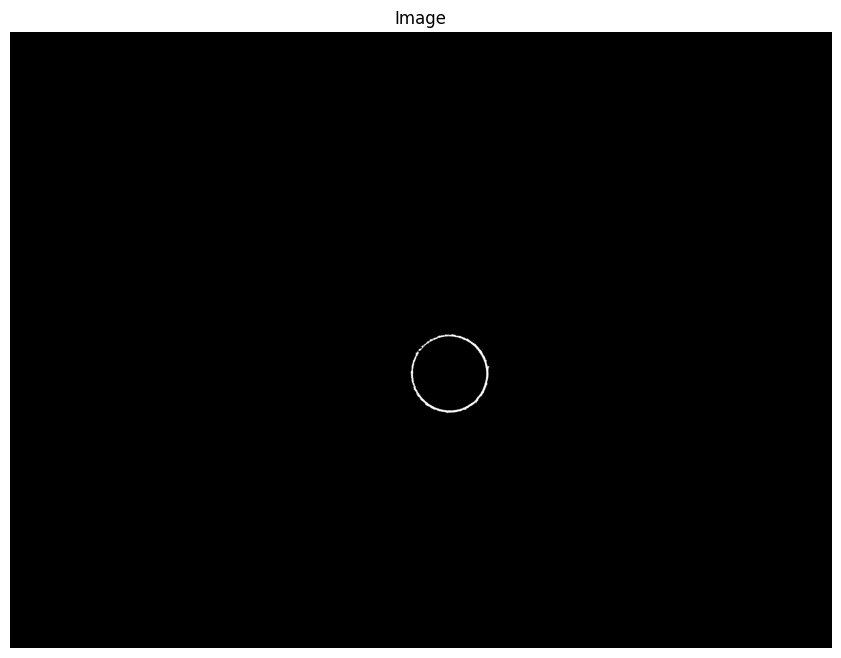

In [366]:
plotImageHist(matrix_final, hist = False)

6.9 Following this, the center is identified, and the positions of the referenced pixels on the edge are determined.

In [367]:
# This matrix will store the positions of white pixels in the image
white_pixels = np.argwhere(matrix_final > 127)  # Threshold to detect white pixels

# Calculate the centroid
centroid = np.mean(white_pixels, axis=0)

# Tuple of the specific central point
centroid_ = tuple(np.uint64(centroid).tolist())

6.10 The central point of the region of interest is marked, and a point is assigned as a reference.

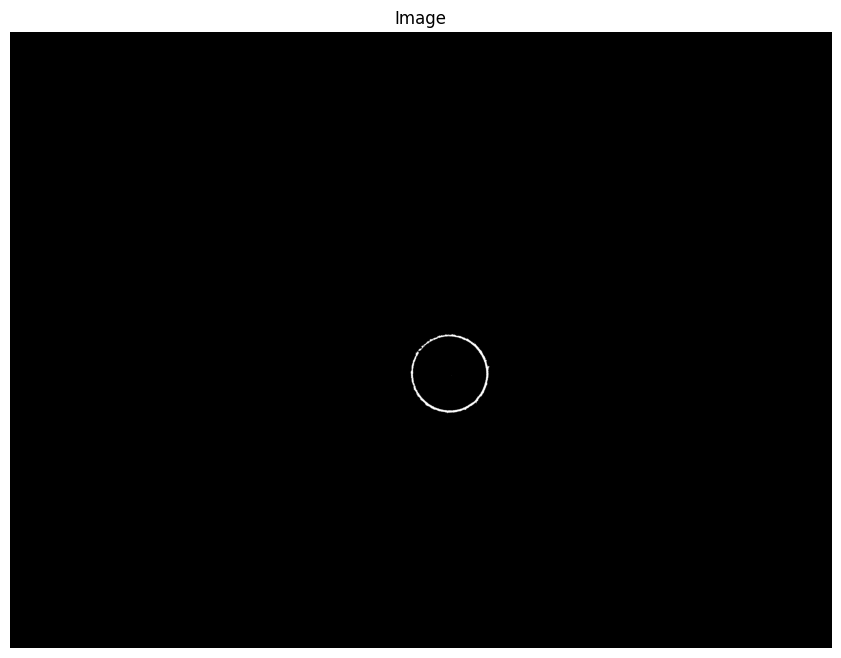

In [368]:
# Copy of the original image to avoid damaging the process
img_copy_m = matrix_final.copy()

# Value assigned to the central point
img_copy_m[centroid_[0], centroid_[1]] = 255

# Visualize the result
plotImageHist(img_copy_m, hist=False)

6.11 I create the function that follows the seed growth algorithm to region, for which an interpolation is also provided to identify the positions between the center and the edge of the image.

In [369]:
def interpolate_points(x1, y1, x2, y2):
    # Calculate the distance between the points
    num_points = max(abs(x2 - x1), abs(y2 - y1)) + 1

    # Generate the interpolated points
    x_points = np.linspace(x1, x2, num_points, dtype=int)
    y_points = np.linspace(y1, y2, num_points, dtype=int)

    return np.vstack((x_points, y_points)).T

def region_growing_binary(img, center_x, center_y, white_points):
    p_img = img.copy()
    # Loop for each of the white points
    for point_pos in white_points:
        points = interpolate_points(
            point_pos[0], point_pos[1],
            center_x, center_y
        )

        for i in points:
            p_img[i[0], i[1]] = 255

    return p_img

6.12 Apply function and img visualization

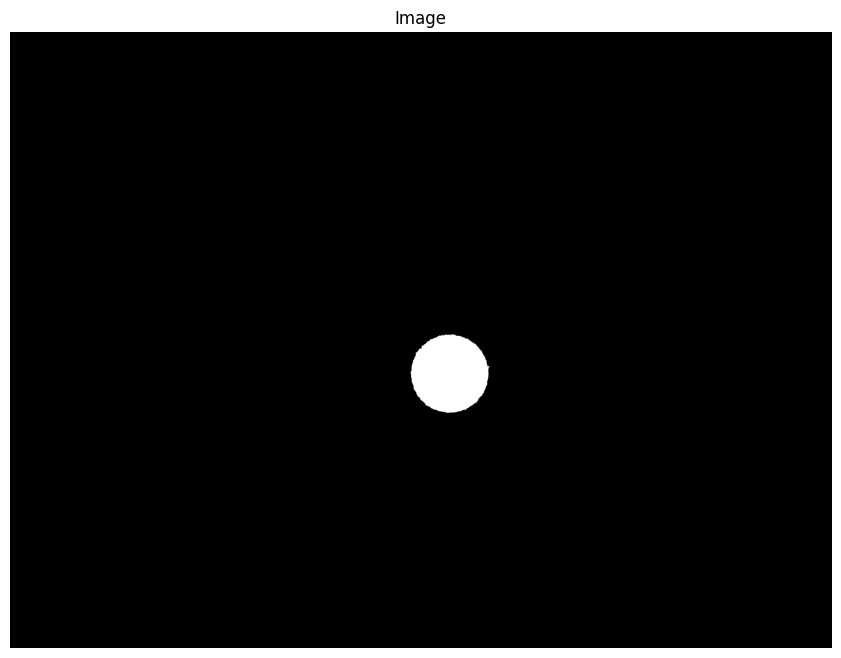

In [370]:
new_img = region_growing_binary(
    img_copy_m, 
    centroide_[0], centroide_[1],
    white_pixels)

plotImageHist(new_img, hist = False)

6.13 Finally, the obtained image is compared with the mask image, as described in the section of the current workshop.

In [371]:
name_img = 'mask'
# The matrices that describe the image are extracted
im_array_p, im_array_d_p = get_img(imagenes_[name_img])
# The dimensions of the image are validated, taking into account the second phase of processing

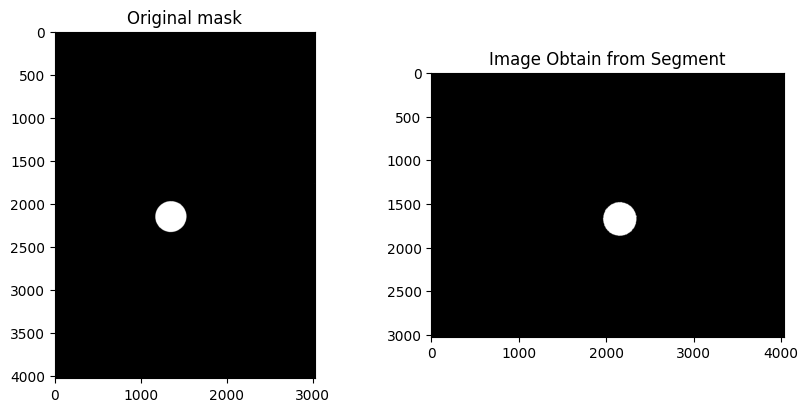

In [372]:
titles = ['Original mask', 'Image Obtain from Segment']
imgs = [im_array_p, new_img]

show_n(imgs = imgs, titles = titles)

6.14 It is necessary to rotate the mask image 90 degrees to the left for an accurate comparison. For that i make the next function for rotate without processing image libraries.

In [373]:
def rotate_90_left(image):
    image_np = image.copy()
    # transponse and invert rows
    rotated_image = np.transpose(image_np, (1, 0))[::-1, :]
    
    return rotated_image

6.15 apply and compare.

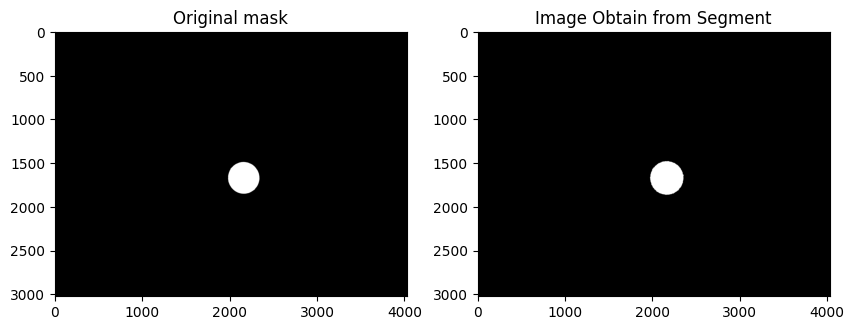

In [374]:
# New mask img
new_mask_img = rotate_90_left(im_array_p)

titles = ['Original mask', 'Image Obtain from Segment']
imgs = [new_mask_img, new_img]

show_n(imgs = imgs, titles = titles)

6.16 To make a more direct comparison, the following function is created to validate pixel-by-pixel differences between the given images.

In [375]:
def compare_binary_images(img1, img2):
    # Ensure the images have the same dimensions
    if img1.shape != img2.shape:
        raise ValueError("The images must have the same dimensions")
    
    # Calculate the difference between the two images
    difference = np.abs(img1 - img2)
    
    # Count the number of different pixels (errors)
    error_pixels = np.sum(difference > 0)
    
    return error_pixels

In [376]:
error_count = compare_binary_images(new_mask_img, new_img)
print("Number of error pixels:", error_count)

Number of error pixels: 12160



Analysis: Given the obtained result, visually, it can be considered that the response is quite similar to the expected mask, but there is an error of approximately 10%, which may be due to pixels scattered as noise within the white object. It would be possible to improve this result by applying some morphological method.

#### 7. Apply the invariant moments (from 1 to 7) to the lena.tif. Apply it under the following conditions: a) normal image; b) image resized by half, c) rotated by 90º; d) rotated 180º. You can use the ready-made functions to resize and rotate images. Compare the obtained results.

7.1 First, the image is loaded for processing and displayed.

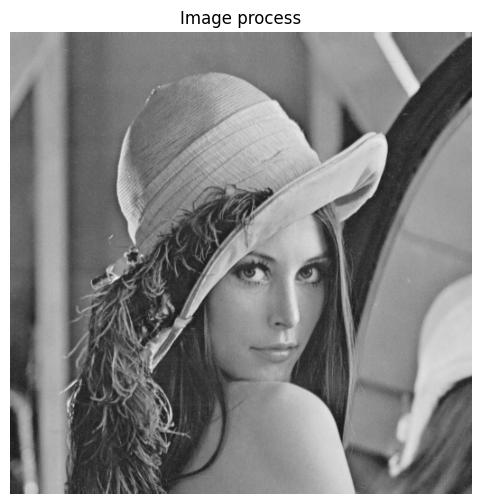

In [377]:
# First, it is necessary to define the name of the image to be processed
name_img = 'lena'
# The matrices describing the image are extracted
im_array, im_array_d = get_img(imagenes_[name_img])
# The dimensions of the image are validated, taking into account the second phase of processing
# Working with color images
img_dim = im_array_d.shape
# Image visualization
plotImage_unique(im_array_d, fig_size = (10, 6), cmap_t = True)

7.2 According to the requests given by the prompt, using the functions from the skimage library, the requested transformations are applied to the loaded image.

In [378]:
# Only for this point, the necessary libraries are loaded
from skimage.transform import rotate, resize
# Creation of an image, resized to half
half_img = resize(im_array_d, (im_array_d.shape[0] / 2, im_array_d.shape[1] / 2))
# Creation of an image rotated 90 degrees
img_r90 = rotate(im_array_d, 90)
# Creation of an image rotated 180 degrees
img_180 = rotate(im_array_d, 180)

7.3 The result of the 4 images is displayed using the visualization function developed in point 2.4.

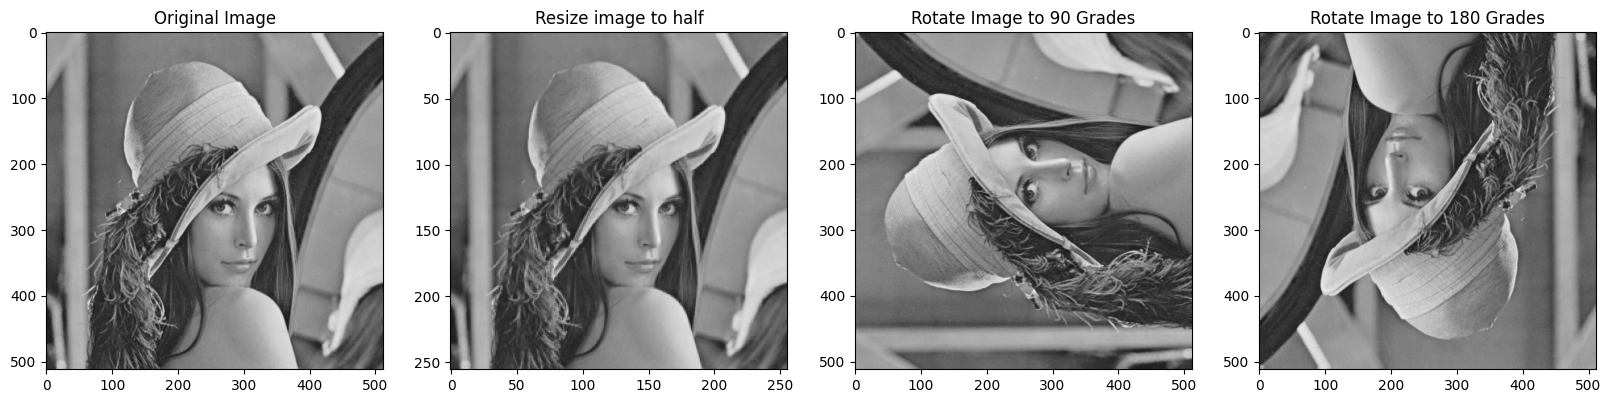

In [379]:
# Images list for visualization
list_img = [
    im_array,
    half_img,
    img_r90,
    img_180
]
# Titles for each imaage
titles = [
    "Original Image",
    "Resize image to half",
    "Rotate Image to 90 Grades",
    "Rotate Image to 180 Grades"
]

show_n(
    list_img,
    size = 2,
    titles = titles
)

7.4 Following the steps presented in the reference book in Chapter 11 - MOMENT INVARIANTS, we implement the functions for calculating invariant moments, starting with the moment calculation function.

In [380]:
def calculo_momento(img_, p, q):
    sumatoria = 0  # Initialize the sum to zero
    dim = img_.shape  # Get the dimensions of the image
    
    # Iterate over each pixel in the image
    for x in range(dim[0]):
        for y in range(dim[1]):
            # Add the contribution of each pixel to the sum
            sumatoria += img_[x, y] * (x**p) * (y**q) 
    
    return sumatoria  # Return the calculated moment

7.5 Next, the central moment calculation function is implemented based on the given parameters.

In [381]:
# Central moment function
def momento_central(img_, p, q, x_, y_):    
    sumatoria = 0  # Initialize the sum to zero
    dim = img_.shape  # Get the dimensions of the image
    
    # Iterate over each pixel in the image
    for x in range(dim[0]):
        for y in range(dim[1]):
            # Add the contribution of each pixel to the sum
            sumatoria += img_[x, y] * ((x - x_)**p) * ((y - y_)**q) 
    
    return sumatoria  # Return the calculated central moment

7.6 The function that calculates the gamma value is implemented.

In [382]:
# Function for calculate with specific p and q
def gamma_c(p, q):
    gamma_value = (p+q)/2+1
    return gamma_value

7.6 The eta calculation function is also implemented.

In [383]:
def eta_c(img_, p, q, mc_00, x_, y_):    
    # Calculate the central moment for the given p and q
    mc_ingresada = momento_central(img_, p, q, x_, y_)
    
    # Calculate the value of gamma based on p and q
    gamma_value = gamma_c(p, q)
    
    # Calculate eta using the formula
    eta_value = mc_ingresada / (mc_00**gamma_value)
    
    return eta_value  # Return the calculated eta value


7.7 Finally, the function for calculating the 7 Hu moments based on a given image is created.

In [384]:
# We create the function that calculates the list of the 7 Hu moments
def momentos_hu(img_):
    # We calculate m00, m01, and m10
    m_00 = calculo_momento(img_, 0, 0)
    m_01 = calculo_momento(img_, 0, 1)
    m_10 = calculo_momento(img_, 1, 0)

    # Next, we calculate x- and y-
    x_ = m_10 / m_00
    y_ = m_01 / m_00

    # And the calculation of the central moment 00
    mc_00 = momento_central(img_, 0, 0, x_, y_)

    # We create the list where the Hu moments will be stored
    hu = [0 for i in range(7)]

    # And we calculate each moment according to the reference book
    hu[0] = eta_c(img_, 2, 0, mc_00, x_, y_) + eta_c(img_, 0, 2, mc_00, x_, y_)

    hu[1] = (eta_c(img_, 2, 0, mc_00, x_, y_) - eta_c(img_, 0, 2, mc_00, x_, y_))**2 + (4 * eta_c(img_, 1, 1, mc_00, x_, y_)**2)

    hu[2] = (eta_c(img_, 3, 0, mc_00, x_, y_) - 3 * eta_c(img_, 1, 2, mc_00, x_, y_))**2 + (3 * eta_c(img_, 2, 1, mc_00, x_, y_) - eta_c(img_, 0, 3, mc_00, x_, y_))**2

    hu[3] = (eta_c(img_, 3, 0, mc_00, x_, y_) + eta_c(img_, 1, 2, mc_00, x_, y_))**2 + (eta_c(img_, 2, 1, mc_00, x_, y_) + eta_c(img_, 0, 3, mc_00, x_, y_))**2

    hu[4] = ((eta_c(img_, 3, 0, mc_00, x_, y_) - 3 * eta_c(img_, 1, 2, mc_00, x_, y_))) * ((eta_c(img_, 3, 0, mc_00, x_, y_) + eta_c(img_, 1, 2, mc_00, x_, y_))) * \
            (((eta_c(img_, 3, 0, mc_00, x_, y_) + eta_c(img_, 1, 2, mc_00, x_, y_))**2) - 3 * ((eta_c(img_, 2, 1, mc_00, x_, y_) + eta_c(img_, 0, 3, mc_00, x_, y_))**2)) + \
            (3 * (eta_c(img_, 2, 1, mc_00, x_, y_) - eta_c(img_, 0, 3, mc_00, x_, y_))) * ((eta_c(img_, 2, 1, mc_00, x_, y_) + eta_c(img_, 0, 3, mc_00, x_, y_))) * \
            (3 * ((eta_c(img_, 3, 0, mc_00, x_, y_) + eta_c(img_, 1, 2, mc_00, x_, y_))**2) - ((eta_c(img_, 2, 1, mc_00, x_, y_) + eta_c(img_, 0, 3, mc_00, x_, y_))**2))
    
    hu[5] = (eta_c(img_, 2, 0, mc_00, x_, y_) - eta_c(img_, 0, 2, mc_00, x_, y_)) * ((eta_c(img_, 3, 0, mc_00, x_, y_) + eta_c(img_, 1, 2, mc_00, x_, y_))**2 - (eta_c(img_, 2, 1, mc_00, x_, y_) + eta_c(img_, 0, 3, mc_00, x_, y_))**2) + \
            (4 * eta_c(img_, 1, 1, mc_00, x_, y_)) * (eta_c(img_, 3, 0, mc_00, x_, y_) + eta_c(img_, 1, 2, mc_00, x_, y_)) * (eta_c(img_, 2, 1, mc_00, x_, y_) + eta_c(img_, 0, 3, mc_00, x_, y_))

    hu[6] = (3 * eta_c(img_, 2, 1, mc_00, x_, y_) - eta_c(img_, 0, 3, mc_00, x_, y_)) * ((eta_c(img_, 3, 0, mc_00, x_, y_) + eta_c(img_, 1, 2, mc_00, x_, y_))) * \
            (((eta_c(img_, 3, 0, mc_00, x_, y_) + eta_c(img_, 1, 2, mc_00, x_, y_))**2) - 3 * ((eta_c(img_, 2, 1, mc_00, x_, y_) + eta_c(img_, 0, 3, mc_00, x_, y_))**2)) + \
            ((eta_c(img_, 1, 2, mc_00, x_, y_) - eta_c(img_, 0, 3, mc_00, x_, y_))) * ((eta_c(img_, 2, 1, mc_00, x_, y_) + eta_c(img_, 0, 3, mc_00, x_, y_))) * \
            (3 * ((eta_c(img_, 3, 0, mc_00, x_, y_) + eta_c(img_, 1, 2, mc_00, x_, y_))**2) - ((eta_c(img_, 2, 1, mc_00, x_, y_) + eta_c(img_, 0, 3, mc_00, x_, y_))**2))
    
    return hu


7.8 According to this function, the procedure is applied to the original image and each of its transformations.

In [385]:
# With that funcion i caalculate each hu moment for each img
hu_normal = momentos_hu(im_array_d)
hu_resize = momentos_hu(half_img)
hu_r90 = momentos_hu(img_r90)
hu_r180 = momentos_hu(img_180)

7.9 These values are usually very small. To observe the real value, a logarithmic transformation is applied to determine the actual numbers.

In [386]:
# Finally, the logarithmic transformation is applied to obtain a more accurate result.
def transformacion_log(hu_list):
    for i in range(len(hu_list)):
        hu_list[i] = -1 * np.copysign(1.0, hu_list[i]) * np.log10(np.abs(hu_list[i]))
    return hu_list

In [387]:
list_moments = transformacion_log(hu_normal)
list_moments_r = transformacion_log(hu_resize)
list_moments_90 = transformacion_log(hu_r90)
list_moments_180 = transformacion_log(hu_r180)

7.10 Tabulating the values allows us to make a closer comparison of the final values obtained. For this, the pandas library is used for data manipulation and tabulation.

In [388]:
import pandas as pd
# Creating a DataFrame
data = {
    'Original Moments': list_moments,
    'Hals-size Moments': list_moments_r,
    'R90 Moments': list_moments_90,
    'R180 Moments': list_moments_180
}
index = ['moment 1', 'moment 2', 'moment 3', 'moment 4', 'moment 5', 'moment 6', 'moment 7']

df = pd.DataFrame(data, index=index)

# Formatting the float values to 7 decimal places
df = df.map(lambda x: f"{x:.7f}")
df

Original Moments Hals-size Moments  R90 Moments R180 Moments
moment 1        2.8741378         2.8741421    2.8741378    2.8741378
moment 2        8.1679152         8.1679217    8.1679152    8.1679152
moment 3       11.9233575        11.9231752   11.9233575   11.9233575
moment 4       10.9382705        10.9382724   10.9382705   10.9382705
moment 5      -22.5773658       -22.5773698  -21.9741076  -22.5773658
moment 6      -15.0556806       -15.0556839  -15.0556806  -15.0556806
moment 7      -22.2442957       -22.2441885  -22.4508544  -22.2442957

Analysis:
The analyses obtained for this point are related to the information presented in section 11 of the reference book, specifically table 11.5, where a similar example to the one applied in this document is given. Firstly, in general terms, it is important to highlight that the difference between the images and the values calculated by Hu moments is very small, so the analysis will be done for each Hu moment.

First Hu moment: In this case, it is observed that the value obtained for the images, Original Moments, R90 Moments, and R180 Moments, is the same = 2.8741378. There is only a change in the Half-size image where the obtained value = 2.8741421, has an approximate difference of +/-4.299999999624049e-06, which is an indicator of the difference in the processing applied to the images and is consistent with the literature.

Second Hu moment: This moment has the same value for each image, so there is nothing that allows us to identify the different images.

Third Hu moment: In this moment, something similar to the first moment occurs, where the difference between the Half-size and the other images is detected by +/-0.0001823000000005237. This can be an indicator of values for all the images.

Fourth Hu moment: In this moment, something similar to the first moment occurs, where the difference between the Half-size and the other images is detected by +/-1.900000000887303e-06. This can be an indicator of values for all the images.

Fifth Hu moment: According to the literature, this moment is used to classify rotated images. Although we can see that the Original and R180 images have the same value, we note a high difference in the R90 image given by +/-0.6032581999999991. Despite the Half-size image also having a difference, it is not significant.

Sixth Hu moment: In this moment, something similar to the first, third, and fourth moments occurs, where the difference between the Half-size and the other images is detected by +/-. This can be an indicator of values for all the images.

Seventh Hu moment: In this case, we note that the Half-size and R90 images are the ones that have variations compared to the others, but they are not very significant.

This procedure allows us to observe that the calculation of moments is a plausible image identification technique, but the obtained results may not be significant for image classification.